# Library

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from numpy import concatenate
import numpy as np

import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tensorflow.python.keras.layers import Dense, GRU, Dropout
from tensorflow.python.keras import Sequential
from math import sqrt;
import tensorflow as tf

# Preprocessing

## Import data

In [23]:
url = "https://drive.google.com/file/d/1u95FUEFI29NV-LmdCRHzRwj-t4tWH87m/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, parse_dates = True,index_col=0)
df.head()

generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   

                           generation fossil coal-derived gas  \
time                                                            
2015-01-01 00:00:00+01:00                                 0.0   
2015-01-01 01:00:00+01:00                                 0.0   
2015-01-01 02:00:00+01:00                                 0.0   
2015-01-01 03:00:00+01:00                                 0.0   
2015-01-01 04:00:00+01:00                                 0.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   

                           generation fossil oil  generation fossil oil shale  \
time                                                                            
2015-01-01 00:00:00+01:00                  162.0                          0.0   
2015-01-01 01:00:00+01:00                  158.0                          0.0   
2015-01-01 02:00:00+01:00                  157.0                          0.0   
2015-01-01 03:00:00+01:00                  160.0                          0.0   
2015-01-01 04:00:00+01:00                  156.0                          0.0   

                           generation fossil peat  generation geothermal  \
time                                                                       
2015-01-01 00:00:00+01:00                     0.0                    0.0   
2015-01-01 01:00:00+01:00                     0.0                    0.0   
2015-01-01 02:00:00+01:00                     0.0                    0.0   
2015-01-01 03:00:00+01:00                     0.0                    0.0   
2015-01-01 04:00:00+01:00                     0.0                    0.0   

                           generation hydro pumped storage aggregated  ...  \
time                                                                   ...   
2015-01-01 00:00:00+01:00                                         NaN  ...   
2015-01-01 01:00:00+01:00                                         NaN  ...   
2015-01-01 02:00:00+01:00                                         NaN  ...   
2015-01-01 03:00:00+01:00                                         NaN  ...   
2015-01-01 04:00:00+01:00                                         NaN  ...   

                           generation waste  generation wind offshore  \
time                                                                    
2015-01-01 00:00:00+01:00             196.0                       0.0   
2015-01-01 01:00:00+01:00             195.0                       0.0   
2015-01-01 02:00:00+01:00             196.0                       0.0   
2015-01-01 03:00:00+01:00             191.0                       0.0   
2015-01-01 04:00:00+01:00             189.0                       0.0   

                           ge

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil coal-derived gas           35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation fossil oil shale                  35046 non-null  float64
 7   generation fossil peat                       35046 non-null  float64
 8   generation geothermal                        35046 non-null  float64
 9   generation hydro pumped storage a

In [25]:
df.isnull().sum()

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

In [26]:
df.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                   0.0            4126.000000   
50%                                   0.0            4969.000000   
75%                                   0.0            6429.000000   
max                                   0.0           20034.000000   

       generation fossil hard coal  generation fossil oil  \
count                 35046.000000           35045.000000   
mean                   4256.065742             298.319789   
std                    1961.601013              52.520673   
min                       0.000000               0.000000   
25%                    2527.000000             263.000000   
50%                    4474.000000             300.000000   
75%                    5838.750000             330.000000   
max                    8359.000000             449.000000   

       generation fossil oil shale  generation fossil peat  \
count                      35046.0                 35046.0   
mean                           0.0                     0.0   
std                            0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
count                35046.0                                         0.0  ...   
mean                     0.0                                         NaN  ...   
std                      0.0                                         NaN  ...   
min                      0.0                                         NaN  ...   
25%                      0.0                                         NaN  ...   
50%                      0.0                                         NaN  ...   
75%                      0.0                                         NaN  ...   
max                      0.0                                         NaN  ...   

       generation waste  generation wind offshore  generation wind onshore  \
count      35045.000000                   35046.0             35046.000000   
mean         269.452133                       0.0              5464.479769   
std           50.195536                       0.0              3213.691587   
min            0.000000                       0.0                 0.000000   
25%          240.000000                       0.0              2933.000000   
50%          279.000000                       0.0              4849.000000   
75%          310.000000                       0.0              7398.000000   
max          357.000000                       0.0             17436.000000   

       forecast solar day ahead  forecast wind offshore eday ahead  \
count              35064.000000                                0.0   
mean                1439.066735                                NaN   
std                 1677.703355       

<AxesSubplot:xlabel='time'>

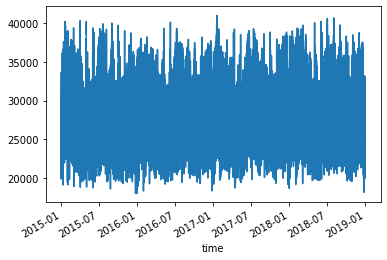

In [27]:
df['total load actual'].plot()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total load actual', ylabel='Density'>

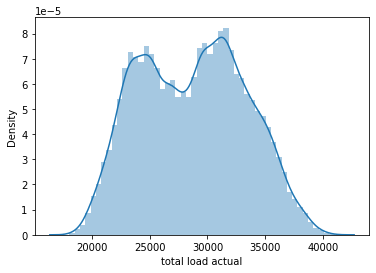

In [28]:
sns.distplot(df['total load actual'])

In [29]:
df.corr()['total load actual']

generation biomass                             0.083288
generation fossil brown coal/lignite           0.280461
generation fossil coal-derived gas                  NaN
generation fossil gas                          0.548913
generation fossil hard coal                    0.396564
generation fossil oil                          0.497089
generation fossil oil shale                         NaN
generation fossil peat                              NaN
generation geothermal                               NaN
generation hydro pumped storage aggregated          NaN
generation hydro pumped storage consumption   -0.562809
generation hydro run-of-river and poundage     0.118570
generation hydro water reservoir               0.479481
generation marine                                   NaN
generation nuclear                             0.085664
generation other                               0.100690
generation other renewable                     0.181714
generation solar                               0

In [30]:
# memindah kolom target ke urutan pertama
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('total load actual')) #Remove b from list
df = df[['total load actual']+cols] #Create new dataframe with columns in the order you want

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   total load actual                            35028 non-null  float64
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal            

Feature Extraction

In [32]:
# Data 2

# All
# df_new = df.drop(df.columns[[10, 23, 25, 26]], axis=1)

# tanpa minus & nan
# df_new = df.drop(df.columns[[3, 7, 8, 9, 10, 11, 14, 20, 23, 25, 26]], axis=1)

# 5 teratas
# df_new = df.drop(df.columns[[1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26]], axis=1)

# 3 teratas
df_new = df.drop(df.columns[[1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]], axis=1)

# Target
# df_new = df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total load actual      35028 non-null  float64
 1   generation fossil gas  35046 non-null  float64
 2   generation fossil oil  35045 non-null  float64
 3   price actual           35064 non-null  float64
dtypes: float64(4)
memory usage: 1.3+ MB


In [34]:
values = df_new.values

In [35]:
values.shape

(35064, 4)

## Normalisasi

In [ ]:
# MinMax
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [36]:
# Z-score
# scaled = stats.zscore(values, axis = 1)

#Z-Score
scaler = StandardScaler()
scaled = scaler.fit_transform(values)

## Convert to Time Series

In [37]:
#covert to time-series
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [38]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)   var2(t)   var3(t)  \
1  -0.723934  -0.353682  -2.595582   0.529854 -0.943172 -0.193813 -2.671744   
2  -0.943172  -0.193813  -2.671744   0.495356 -1.303397 -0.347778 -2.690784   
3  -1.303397  -0.347778  -2.690784   0.464379 -1.619905 -0.594395 -2.633663   
4  -1.619905  -0.594395  -2.633663   0.101098 -1.843297 -0.677963 -2.709825   
5  -1.843297  -0.677963  -2.709825  -0.129825 -1.921768 -0.719747 -2.709825   

    var4(t)  
1  0.495356  
2  0.464379  
3  0.101098  
4 -0.129825  
5 -0.299497

In [39]:
reframed.shape

(34994, 8)

In [40]:
# Data 2

# All
# reframed.drop(reframed.columns[[x for x in range(25, 48)]], axis=1, inplace=True)

# no minus dan NaN
# reframed.drop(reframed.columns[[x for x in range(18, 34)]], axis=1, inplace=True)

# Top 5
# reframed.drop(reframed.columns[[x for x in range(7, 12)]], axis=1, inplace=True)

# Top 3
reframed.drop(reframed.columns[[x for x in range(5, 8)]], axis=1, inplace=True)

reframed.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1  -0.723934  -0.353682  -2.595582   0.529854 -0.943172
2  -0.943172  -0.193813  -2.671744   0.495356 -1.303397
3  -1.303397  -0.347778  -2.690784   0.464379 -1.619905
4  -1.619905  -0.594395  -2.633663   0.101098 -1.843297
5  -1.843297  -0.677963  -2.709825  -0.129825 -1.921768

## Split data

In [ ]:
#split into train and test sets
values = reframed.values
# n_train = round(values.shape[0])

train = values[:, :]
test = values[:, :]

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

#reshap input menjadi 3D ([)samples, timesteps, features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Model Building

### Random Search

In [ ]:
#design network GRU
model = Sequential()
model.add(GRU(31, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
model.add(Dropout(0.2))

model.add(GRU(units = 31, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(GRU(units = 31, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 1, 31)             3069      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 31)             0         
_________________________________________________________________
gru_3 (GRU)                  (None, 1, 31)             5859      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 31)             0         
_________________________________________________________________
gru_4 (GRU)                  (None, 1, 31)             5859      
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 31)             0         
_________________________________________________________________
dense (Dense)                (None, 1, 1)             

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=63, batch_size=1000, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/63
36/36 [==============================] - 12s 68ms/step - loss: 1.1789 - val_loss: 1.0457
Epoch 2/63
36/36 [==============================] - 1s 25ms/step - loss: 0.8568 - val_loss: 0.6815
Epoch 3/63
36/36 [==============================] - 1s 20ms/step - loss: 0.6416 - val_loss: 0.6115
Epoch 4/63
36/36 [==============================] - 1s 20ms/step - loss: 0.6060 - val_loss: 0.5979
Epoch 5/63
36/36 [==============================] - 1s 20ms/step - loss: 0.5973 - val_loss: 0.5933
Epoch 6/63
36/36 [==============================] - 1s 21ms/step - loss: 0.5939 - val_loss: 0.5913
Epoch 7/63
36/36 [==============================] - 1s 21ms/step - loss: 0.5923 - val_loss: 0.5905
Epoch 8/63
36/36 [==============================] - 1s 20ms/step - loss: 0.5915 - val_loss: 0.5901
Epoch 9/63
36/36 [==============================] - 1s 20ms/step - loss: 0.5912 - val_loss: 0.5899
Epoch 10/63
36/36 [==============================] - 1s 20ms/step - loss: 0.5909 - val_loss: 0.5897
Epoch 11

### Grid Search

In [ ]:
#design network GRU
model = Sequential()
model.add(GRU(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
model.add(Dropout(0.2))

model.add(GRU(units = 32, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(GRU(units = 32, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

# Evaluasi

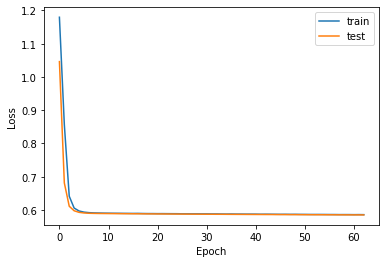

In [ ]:
#plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

In [ ]:
#membuat prediksi training
xhat = model.predict(train_X)
xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

#invert scaling untuk peramalan
inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
inv_xhat = scaler.inverse_transform(inv_xhat)
inv_xhat = inv_xhat[:,0]

#invert scaling untuk aktual
train_y = train_y.reshape((len(train_y), 1))
inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#================================================================#

#membuat prediksi testing
yhat = model.predict(test_X)
yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#invert scaling untuk peramalan
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

#invert scaling untuk aktual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [ ]:
# calculate RMSE
np.seterr(divide='ignore', invalid='ignore')
def mean_absolute_percentage_error(yhat, test_y):
      yhat, test_y = np.array(yhat), np.array(test_y)
      return np.mean(np.abs((yhat, test_y) / test_y))

print('==============minmax===================')
print(f'MAPE test is : %.5f' % (mean_absolute_percentage_error(test_y, yhat)))
print(f'MAPE test invert is : %.5f' % (mean_absolute_percentage_error(inv_y, inv_yhat)))

print('==============zscore===================')
print(f'MAPE test is : %.5f' % (mean_absolute_percentage_error(yhat, test_y)))
print(f'MAPE test invert is : %.5f' % (mean_absolute_percentage_error(inv_yhat, inv_y)))

print('=======================================')
rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
print(f'RMSE Testing is : %.3f' % rmsetest)
rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

print(f'R2 test is : %.5f' % r2_score(test_y, yhat))
print(f'R2 test invert is : %.5f' % r2_score(inv_y, inv_yhat))

==============minmax===================
MAPE test is : 52024.56080582172
MAPE test invert is : 0.972643765048071
==============zscore===================
MAPE test is : 1.4744828915352928
MAPE test invert is : 1.036243607715573
RMSE Testing is : 0.765
RMSE Testing invert is : 3500.649
R2 test is : 0.4142278488402408
R2 test invert is : 0.4142278488402409


Actual : [[-0.94317221]
 [-1.30339688]
 [-1.61990496]
 ...
 [-0.13681978]
 [-0.63300303]
 [-0.92721566]]
Predicted: [[4.3262564e-05]
 [1.1875598e-05]
 [3.3141732e-06]
 ...
 [1.5049253e-01]
 [6.4112041e-03]
 [8.4965082e-05]]


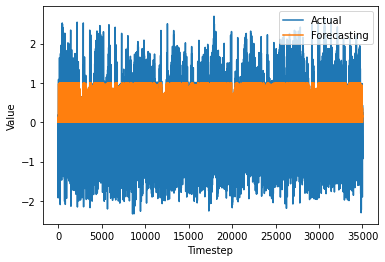

In [ ]:
print('Actual :', test_y)
print('Predicted:', yhat)
# plot history
pyplot.plot(test_y, label='Actual')
pyplot.plot(yhat, label='Forecasting')
pyplot.xlabel('Timestep')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

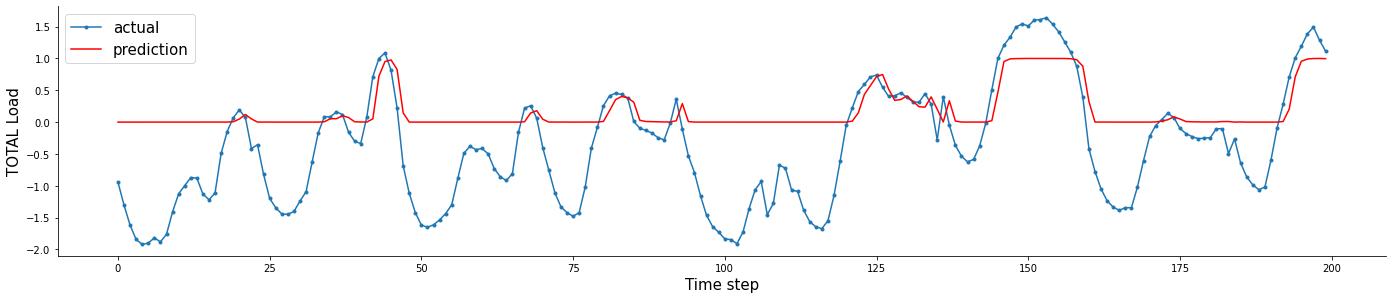

In [ ]:
idx = 200#int(len(yhat))
aa=[x for x in range(idx)]
pyplot.figure(figsize=(20,4))
pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
pyplot.tight_layout()
sns.despine(top=True)
pyplot.subplots_adjust(left=0.07)
pyplot.ylabel('TOTAL Load', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()

# 5 run grid

## tanh minmax

Epoch 1/50
351/351 [==============================] - 14s 9ms/step - loss: 0.0134 - val_loss: 0.0056
Epoch 2/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0047 - val_loss: 0.0050
Epoch 3/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0047 - val_loss: 0.0055
Epoch 4/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 5/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0046 - val_loss: 0.0052
Epoch 6/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0046 - val_loss: 0.0052
Epoch 7/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 8/50
351/351 [==============================] - 2s 6ms/step - loss: 0.0046 - val_loss: 0.0052
Epoch 9/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0046 - val_loss: 0.0052
Epoch 10/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0046 - val_loss: 0.005

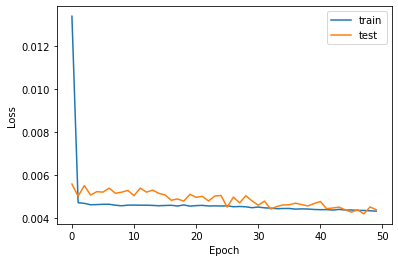

==============minmax===================
MAPE test is : 583954811154.50183
MAPE test invert is : 3.97392
==============zscore===================
MAPE test is : 14.21801
MAPE test invert is : 4.14534
RMSE Testing is : 0.066
RMSE Testing invert is : 1521.591
R2 test is : 0.88933


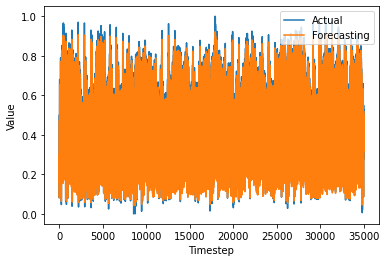

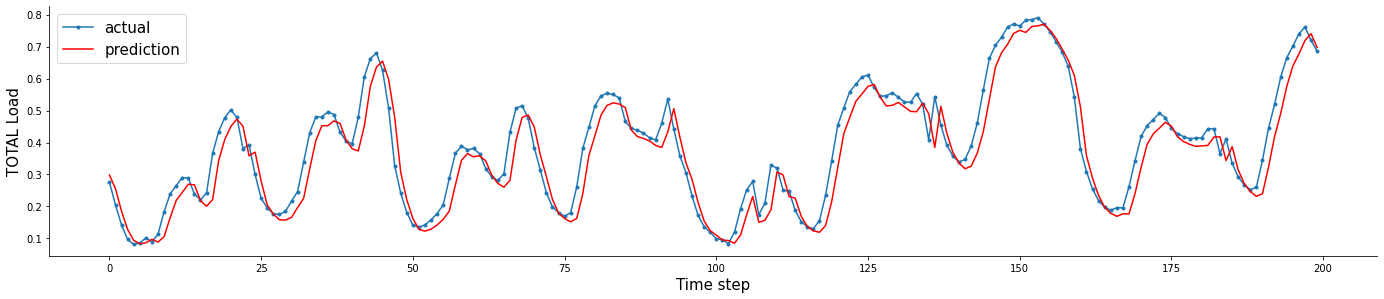

Epoch 1/50
351/351 [==============================] - 9s 9ms/step - loss: 0.0130 - val_loss: 0.0050
Epoch 2/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 3/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 4/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 5/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 6/50
351/351 [==============================] - 2s 6ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 7/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 8/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 9/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 10/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0046 - val_loss: 0.0049

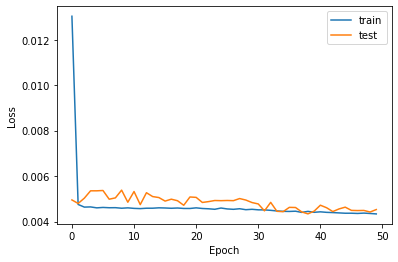

==============minmax===================
MAPE test is : 622614347966.75696
MAPE test invert is : 4.07622
==============zscore===================
MAPE test is : 14.34549
MAPE test invert is : 4.26189
RMSE Testing is : 0.067
RMSE Testing invert is : 1545.846
R2 test is : 0.88577


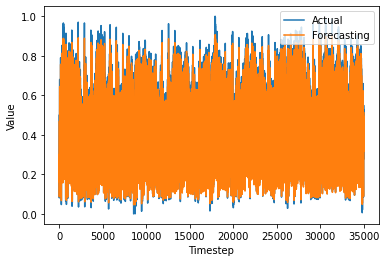

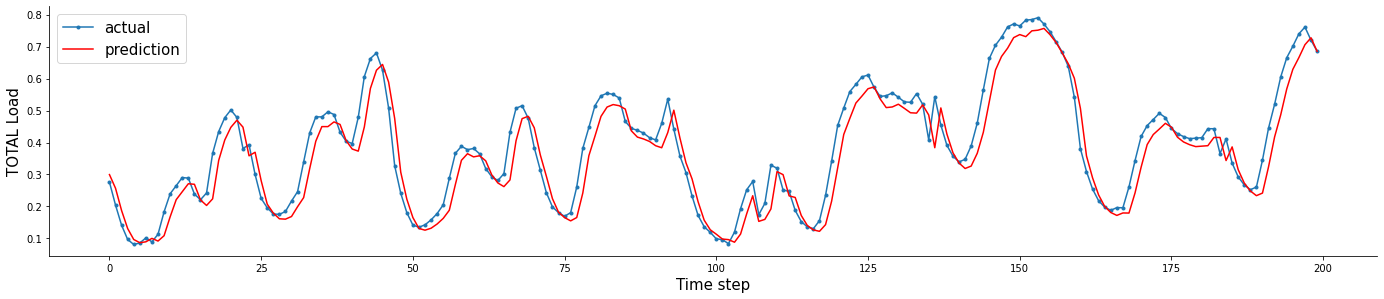

Epoch 1/50
351/351 [==============================] - 17s 17ms/step - loss: 0.0130 - val_loss: 0.0058
Epoch 2/50
351/351 [==============================] - 4s 12ms/step - loss: 0.0047 - val_loss: 0.0054
Epoch 3/50
351/351 [==============================] - 4s 12ms/step - loss: 0.0046 - val_loss: 0.0056
Epoch 4/50
351/351 [==============================] - 5s 14ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 5/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 6/50
351/351 [==============================] - 5s 13ms/step - loss: 0.0046 - val_loss: 0.0053
Epoch 7/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0046 - val_loss: 0.0052
Epoch 8/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0046 - val_loss: 0.0052
Epoch 9/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0046 - val_loss: 0.0052
Epoch 10/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0046 - val_loss:

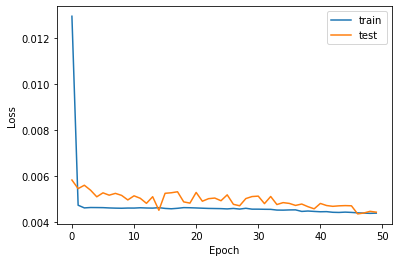

==============minmax===================
MAPE test is : 655091932404.67578
MAPE test invert is : 4.02845
==============zscore===================
MAPE test is : 13.89295
MAPE test invert is : 4.19789
RMSE Testing is : 0.066
RMSE Testing invert is : 1527.662
R2 test is : 0.88845


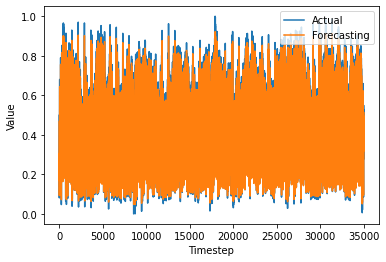

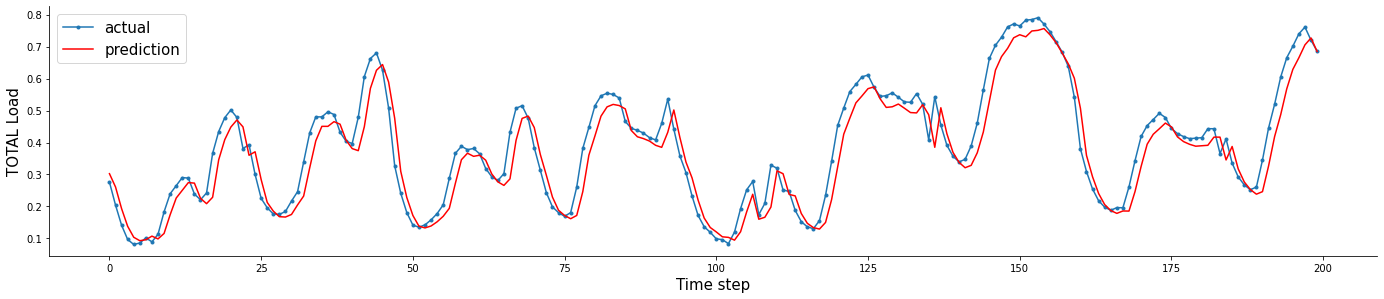

Epoch 1/50
351/351 [==============================] - 10s 9ms/step - loss: 0.0137 - val_loss: 0.0057
Epoch 2/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0047 - val_loss: 0.0049
Epoch 3/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0047 - val_loss: 0.0054
Epoch 4/50
351/351 [==============================] - 5s 13ms/step - loss: 0.0046 - val_loss: 0.0055
Epoch 5/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 6/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0046 - val_loss: 0.0052
Epoch 7/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 8/50
351/351 [==============================] - 3s 10ms/step - loss: 0.0046 - val_loss: 0.0053
Epoch 9/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 10/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0046 - val_loss: 0.0

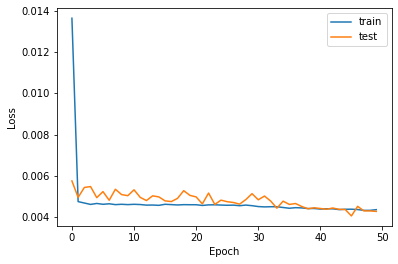

==============minmax===================
MAPE test is : 612778839884.13098
MAPE test invert is : 3.93738
==============zscore===================
MAPE test is : 13.72031
MAPE test invert is : 4.08695
RMSE Testing is : 0.065
RMSE Testing invert is : 1499.948
R2 test is : 0.89246


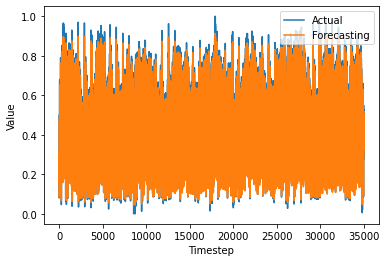

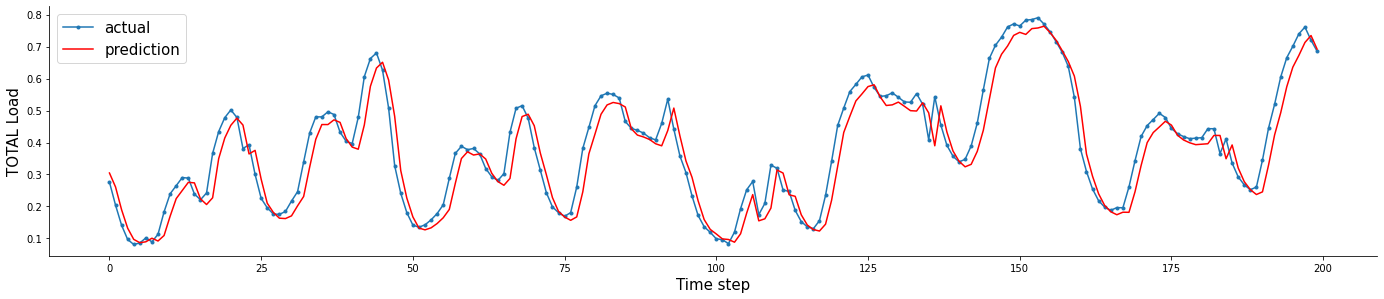

Epoch 1/50
351/351 [==============================] - 10s 10ms/step - loss: 0.0134 - val_loss: 0.0053
Epoch 2/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0047 - val_loss: 0.0055
Epoch 3/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 4/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 5/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0046 - val_loss: 0.0052
Epoch 6/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 7/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0046 - val_loss: 0.0053
Epoch 8/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0046 - val_loss: 0.0052
Epoch 9/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0046 - val_loss: 0.0053
Epoch 10/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0046 - val_loss: 0.00

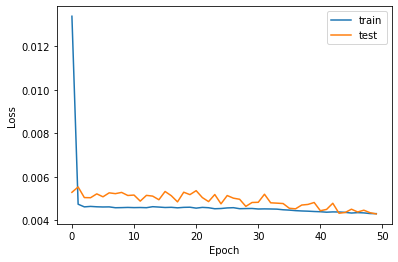

==============minmax===================
MAPE test is : 604319681785.73804
MAPE test invert is : 3.95773
==============zscore===================
MAPE test is : 13.78345
MAPE test invert is : 4.11312
RMSE Testing is : 0.066
RMSE Testing invert is : 1506.467
R2 test is : 0.89152


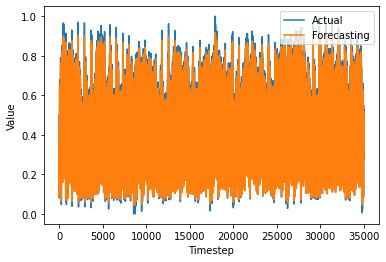

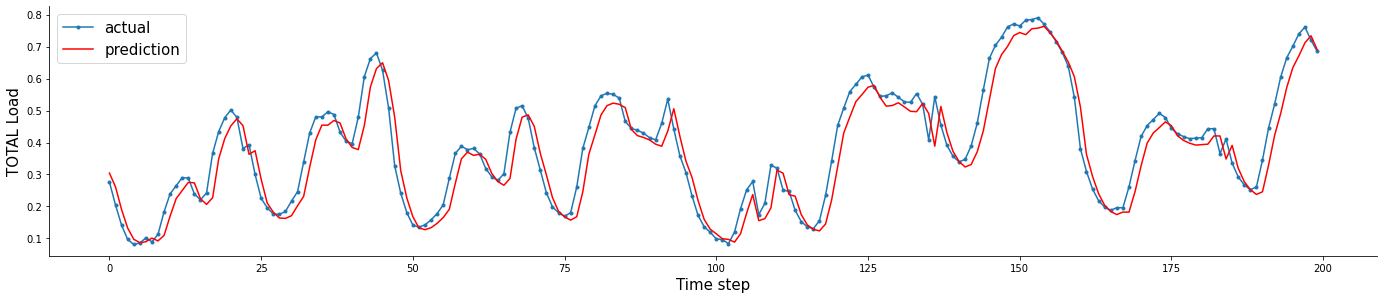

0                    1                    2  \
0    583954811154,5018     622614347966,757    655091932404,6758   
1   3,9739232198625825    4,076222403392603   4,0284525478967765   
2   14,218014390825076   14,345490474060274   13,892952307438309   
3    4,145342371951542    4,261886776329211    4,197891565789521   
4  0.06623100480488546  0.06728675201845251  0.06649526554214248   
5   1521,5911043874387   1545,8458408719282   1527,6622305651815   
6   0,8893306325038531   0,8857742889272591   0,8884457323448568   
7                  177                  150                  156   

                     3                    4           nama  
0     612778839884,131     604319681785,738        mminmax  
1   3,9373791792227117    3,957734053929423  minmax invert  
2   13,720313865536719   13,783447604054045         zscore  
3    4,086947222775745     4,11311829014466  zscpre invert  
4  0.06528895105341521  0.06557269154675922           rmse  
5   1499,9483615011611   1506,4670155952465    rmse invert  
6   0,8924565108924286   0,8915197291304284             r2  
7                  149                  146          waktu

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network LSTM
  #design network GRU
  model = Sequential()
  model.add(GRU(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.show()
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]


  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## tanh zscore

Epoch 1/50
351/351 [==============================] - 13s 12ms/step - loss: 0.6684 - val_loss: 0.5895
Epoch 2/50
351/351 [==============================] - 3s 7ms/step - loss: 0.5893 - val_loss: 0.5884
Epoch 3/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5881 - val_loss: 0.5875
Epoch 4/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5872 - val_loss: 0.5867
Epoch 5/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5865 - val_loss: 0.5860
Epoch 6/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5858 - val_loss: 0.5855
Epoch 7/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5855 - val_loss: 0.5851
Epoch 8/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5852 - val_loss: 0.5850
Epoch 9/50
351/351 [==============================] - 3s 10ms/step - loss: 0.5851 - val_loss: 0.5851
Epoch 10/50
351/351 [==============================] - 2s 7ms/step - loss: 0.5853 - val_loss: 0.5

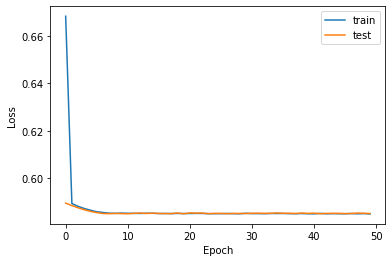

==============minmax===================
MAPE test is : 208.24779
MAPE test invert is : 10.60319
==============zscore===================
MAPE test is : 750313321.58131
MAPE test invert is : 9.10881
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.440
R2 test is : 0.41463


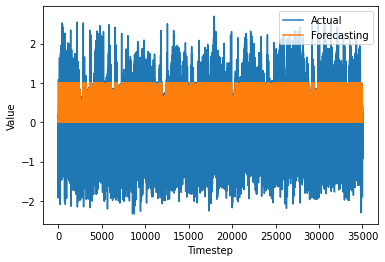

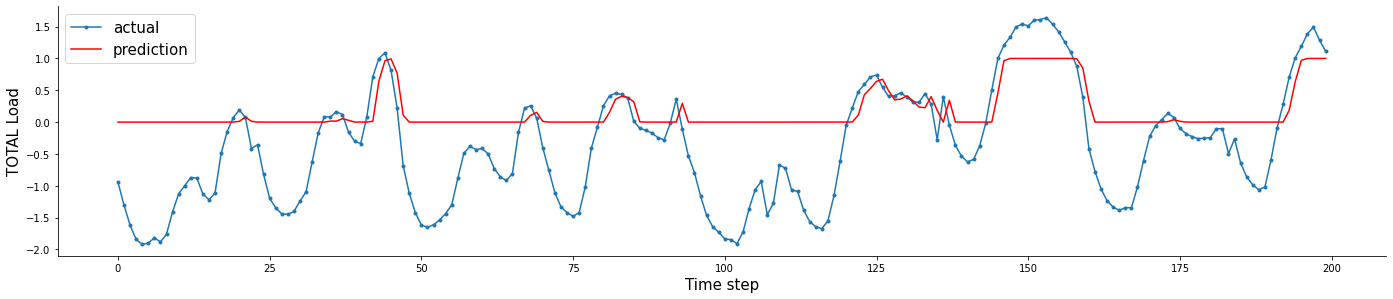

Epoch 1/50
351/351 [==============================] - 9s 9ms/step - loss: 0.6665 - val_loss: 0.5894
Epoch 2/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5892 - val_loss: 0.5884
Epoch 3/50
351/351 [==============================] - 3s 7ms/step - loss: 0.5881 - val_loss: 0.5875
Epoch 4/50
351/351 [==============================] - 2s 7ms/step - loss: 0.5870 - val_loss: 0.5865
Epoch 5/50
351/351 [==============================] - 3s 7ms/step - loss: 0.5862 - val_loss: 0.5858
Epoch 6/50
351/351 [==============================] - 3s 7ms/step - loss: 0.5858 - val_loss: 0.5855
Epoch 7/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5855 - val_loss: 0.5853
Epoch 8/50
351/351 [==============================] - 2s 7ms/step - loss: 0.5853 - val_loss: 0.5852
Epoch 9/50
351/351 [==============================] - 2s 7ms/step - loss: 0.5853 - val_loss: 0.5851
Epoch 10/50
351/351 [==============================] - 2s 7ms/step - loss: 0.5853 - val_loss: 0.5852

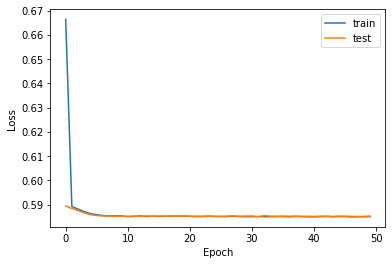

==============minmax===================
MAPE test is : 206.25864
MAPE test invert is : 10.60599
==============zscore===================
MAPE test is : 439068259.13317
MAPE test invert is : 9.11176
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.736
R2 test is : 0.41453


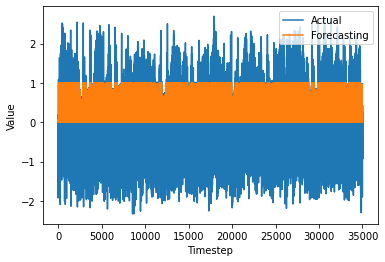

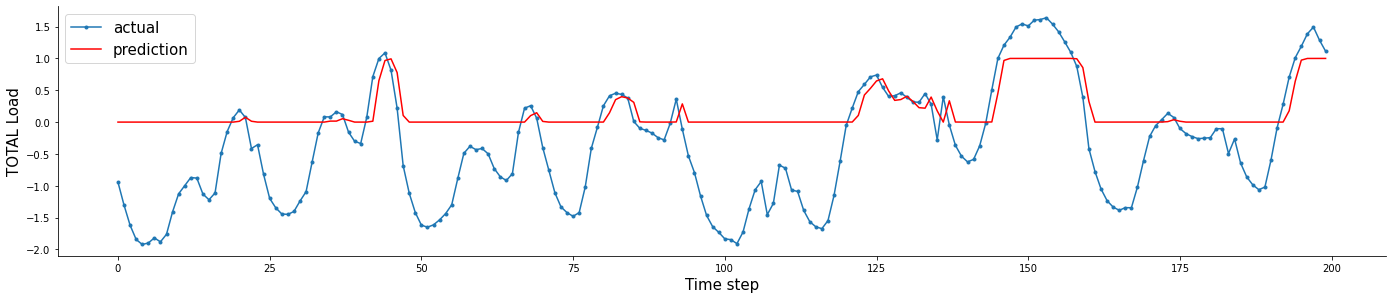

Epoch 1/50
351/351 [==============================] - 12s 11ms/step - loss: 0.6697 - val_loss: 0.5895
Epoch 2/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5891 - val_loss: 0.5884
Epoch 3/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5882 - val_loss: 0.5878
Epoch 4/50
351/351 [==============================] - 3s 10ms/step - loss: 0.5876 - val_loss: 0.5870
Epoch 5/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5869 - val_loss: 0.5865
Epoch 6/50
351/351 [==============================] - 4s 11ms/step - loss: 0.5861 - val_loss: 0.5858
Epoch 7/50
351/351 [==============================] - 4s 10ms/step - loss: 0.5857 - val_loss: 0.5854
Epoch 8/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5855 - val_loss: 0.5853
Epoch 9/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5854 - val_loss: 0.5851
Epoch 10/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5854 - val_loss: 0

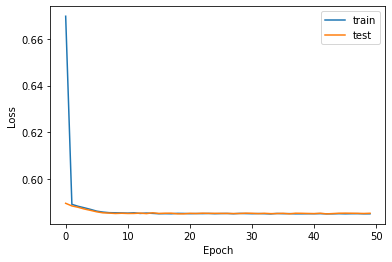

==============minmax===================
MAPE test is : 205.20506
MAPE test invert is : 10.60699
==============zscore===================
MAPE test is : 1103332898.00436
MAPE test invert is : 9.11330
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.803
R2 test is : 0.41451


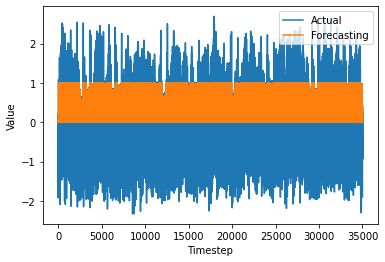

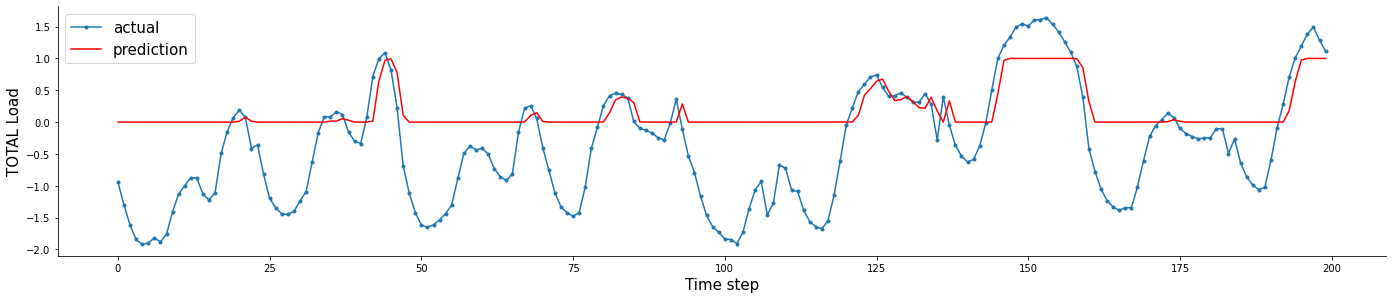

Epoch 1/50
351/351 [==============================] - 11s 12ms/step - loss: 0.6618 - val_loss: 0.5894
Epoch 2/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5891 - val_loss: 0.5883
Epoch 3/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5882 - val_loss: 0.5876
Epoch 4/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5873 - val_loss: 0.5869
Epoch 5/50
351/351 [==============================] - 3s 10ms/step - loss: 0.5864 - val_loss: 0.5860
Epoch 6/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5859 - val_loss: 0.5855
Epoch 7/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5855 - val_loss: 0.5852
Epoch 8/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5854 - val_loss: 0.5852
Epoch 9/50
351/351 [==============================] - 4s 10ms/step - loss: 0.5853 - val_loss: 0.5852
Epoch 10/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5853 - val_loss: 0.

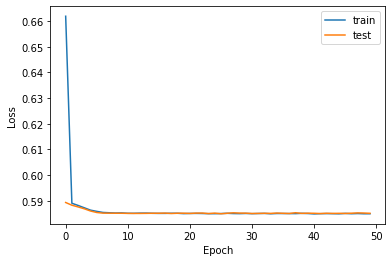

==============minmax===================
MAPE test is : 207.66091
MAPE test invert is : 10.60396
==============zscore===================
MAPE test is : 380942471.88949
MAPE test invert is : 9.10868
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.580
R2 test is : 0.41459


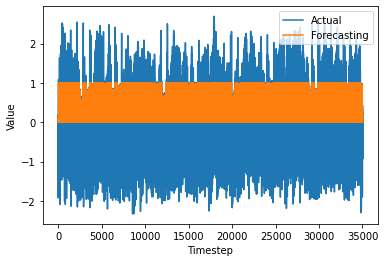

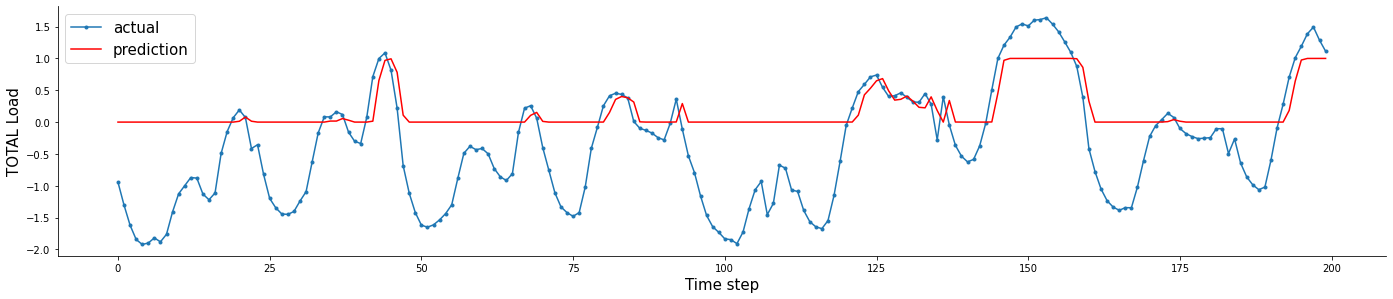

Epoch 1/50
351/351 [==============================] - 11s 14ms/step - loss: 0.6600 - val_loss: 0.5898
Epoch 2/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5893 - val_loss: 0.5885
Epoch 3/50
351/351 [==============================] - 4s 11ms/step - loss: 0.5883 - val_loss: 0.5878
Epoch 4/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5875 - val_loss: 0.5870
Epoch 5/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5867 - val_loss: 0.5860
Epoch 6/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5859 - val_loss: 0.5856
Epoch 7/50
351/351 [==============================] - 4s 11ms/step - loss: 0.5855 - val_loss: 0.5851
Epoch 8/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5852 - val_loss: 0.5850
Epoch 9/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5851 - val_loss: 0.5851
Epoch 10/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5851 - val_loss: 0.

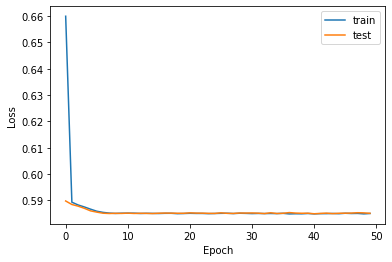

==============minmax===================
MAPE test is : 208.93990
MAPE test invert is : 10.60278
==============zscore===================
MAPE test is : 367373316.63970
MAPE test invert is : 9.10687
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.477
R2 test is : 0.41462


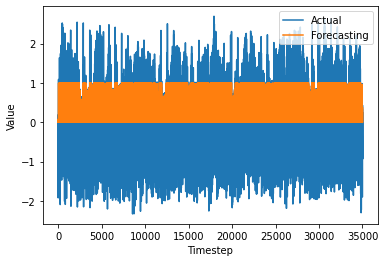

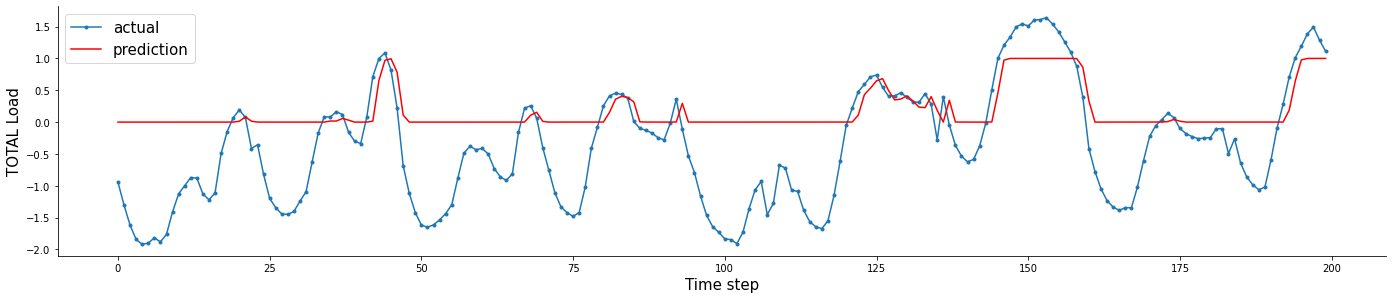

0                   1                   2  \
0    208,2477925350244   206,2586352109507  205,20506470043279   
1   10,603188024147952  10,605986714925827   10,60699496051569   
2    750313321,5813133   439068259,1331684  1103332898,0043645   
3     9,10881447624207   9,111757715451738   9,113301411239581   
4   0.7649177958011796  0.7649824731663447  0.7649973002179897   
5     3499,43974546452   3499,735639407024  3499,8034720213514   
6  0,41463258037561357   0,414533585102701  0,4145108896156784   
7                  211                 138                 210   

                     3                   4           nama  
0   207,66091264746348    208,939896271105        mminmax  
1   10,603958635434145  10,602781498766108  minmax invert  
2   380942471,88949484  367373316,63970417         zscore  
3    9,108678023363275   9,106871699609814  zscpre invert  
4    0.764948515060517  0.7649259437518496           rmse  
5    3499,580283699697    3499,47702170855    rmse invert  
6  0,41458556247447087  0,4146201095708084             r2  
7                  209                 209          waktu

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(GRU(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto2") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto2")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto2")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig zscore

Epoch 1/50
351/351 [==============================] - 11s 9ms/step - loss: 1.0073 - val_loss: 0.9482
Epoch 2/50
351/351 [==============================] - 3s 7ms/step - loss: 0.8545 - val_loss: 0.7141
Epoch 3/50
351/351 [==============================] - 2s 7ms/step - loss: 0.6516 - val_loss: 0.5956
Epoch 4/50
351/351 [==============================] - 3s 9ms/step - loss: 0.6038 - val_loss: 0.5913
Epoch 5/50
351/351 [==============================] - 3s 7ms/step - loss: 0.5986 - val_loss: 0.5904
Epoch 6/50
351/351 [==============================] - 2s 7ms/step - loss: 0.5962 - val_loss: 0.5899
Epoch 7/50
351/351 [==============================] - 2s 7ms/step - loss: 0.5950 - val_loss: 0.5891
Epoch 8/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5936 - val_loss: 0.5880
Epoch 9/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5920 - val_loss: 0.5870
Epoch 10/50
351/351 [==============================] - 2s 7ms/step - loss: 0.5904 - val_loss: 0.586

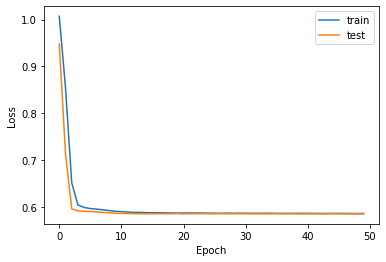

==============minmax===================
MAPE test is : 209.47706
MAPE test invert is : 10.59568
==============zscore===================
MAPE test is : 23779440.12529
MAPE test invert is : 9.09945
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.748
R2 test is : 0.41486


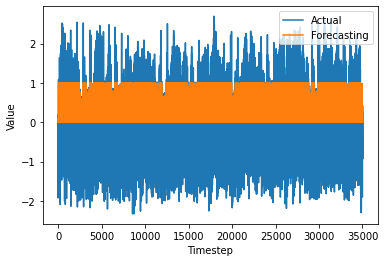

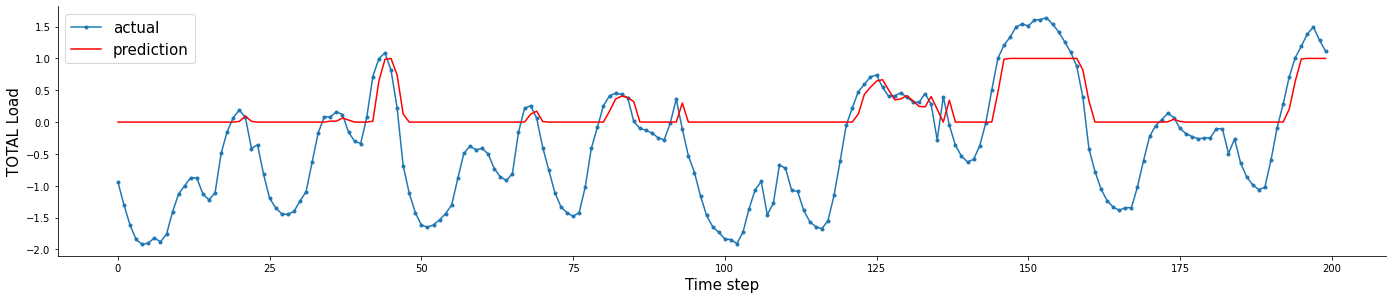

Epoch 1/50
351/351 [==============================] - 12s 10ms/step - loss: 1.0173 - val_loss: 0.9239
Epoch 2/50
351/351 [==============================] - 3s 10ms/step - loss: 0.8289 - val_loss: 0.6869
Epoch 3/50
351/351 [==============================] - 3s 8ms/step - loss: 0.6405 - val_loss: 0.5943
Epoch 4/50
351/351 [==============================] - 3s 8ms/step - loss: 0.6021 - val_loss: 0.5918
Epoch 5/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5983 - val_loss: 0.5907
Epoch 6/50
351/351 [==============================] - 3s 10ms/step - loss: 0.5976 - val_loss: 0.5903
Epoch 7/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5965 - val_loss: 0.5897
Epoch 8/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5950 - val_loss: 0.5891
Epoch 9/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5945 - val_loss: 0.5886
Epoch 10/50
351/351 [==============================] - 3s 10ms/step - loss: 0.5936 - val_loss: 0

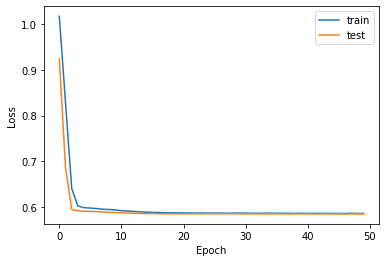

==============minmax===================
MAPE test is : 210.50515
MAPE test invert is : 10.59414
==============zscore===================
MAPE test is : 15481511.46234
MAPE test invert is : 9.09768
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.591
R2 test is : 0.41492


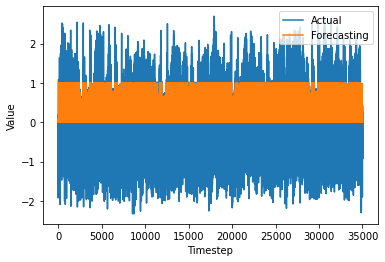

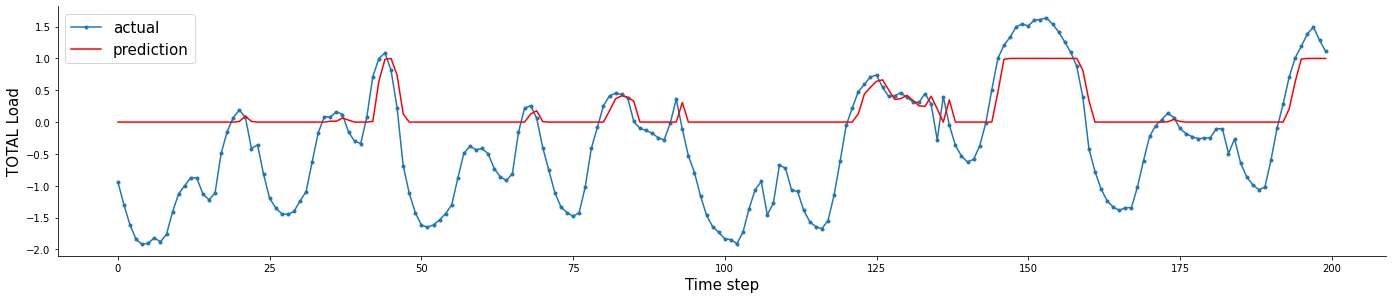

Epoch 1/50
351/351 [==============================] - 13s 11ms/step - loss: 1.0011 - val_loss: 0.9526
Epoch 2/50
351/351 [==============================] - 3s 9ms/step - loss: 0.8518 - val_loss: 0.6988
Epoch 3/50
351/351 [==============================] - 3s 10ms/step - loss: 0.6407 - val_loss: 0.5927
Epoch 4/50
351/351 [==============================] - 3s 8ms/step - loss: 0.6033 - val_loss: 0.5917
Epoch 5/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5987 - val_loss: 0.5906
Epoch 6/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5973 - val_loss: 0.5901
Epoch 7/50
351/351 [==============================] - 4s 10ms/step - loss: 0.5958 - val_loss: 0.5893
Epoch 8/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5943 - val_loss: 0.5886
Epoch 9/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5931 - val_loss: 0.5877
Epoch 10/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5917 - val_loss: 0.

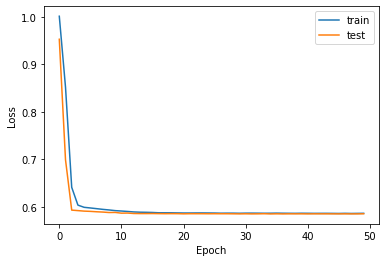

==============minmax===================
MAPE test is : 203.39917
MAPE test invert is : 10.60243
==============zscore===================
MAPE test is : 27436038.07699
MAPE test invert is : 9.10890
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.298
R2 test is : 0.41468


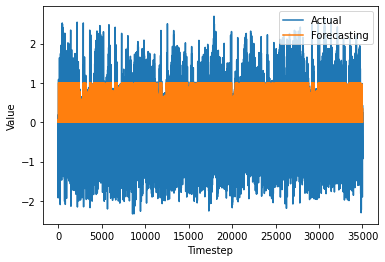

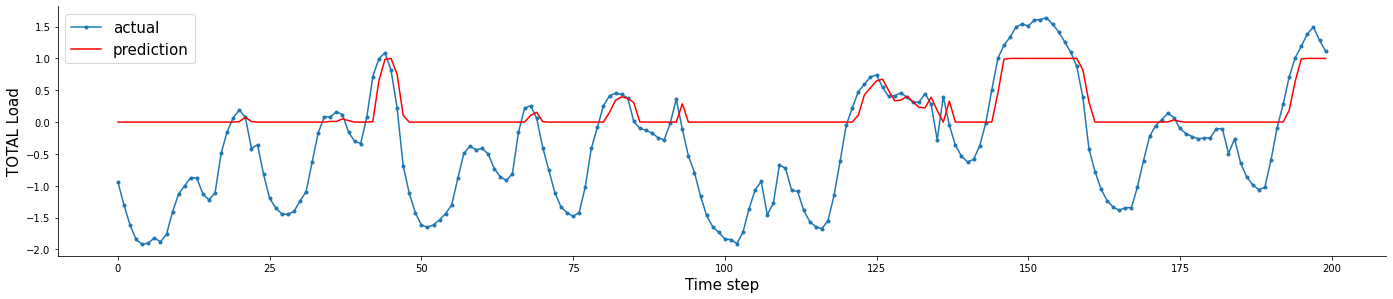

Epoch 1/50
351/351 [==============================] - 10s 12ms/step - loss: 1.0215 - val_loss: 0.9181
Epoch 2/50
351/351 [==============================] - 3s 8ms/step - loss: 0.8281 - val_loss: 0.7025
Epoch 3/50
351/351 [==============================] - 3s 8ms/step - loss: 0.6577 - val_loss: 0.6026
Epoch 4/50
351/351 [==============================] - 3s 8ms/step - loss: 0.6050 - val_loss: 0.5924
Epoch 5/50
351/351 [==============================] - 3s 10ms/step - loss: 0.5994 - val_loss: 0.5929
Epoch 6/50
351/351 [==============================] - 3s 7ms/step - loss: 0.5984 - val_loss: 0.5918
Epoch 7/50
351/351 [==============================] - 2s 7ms/step - loss: 0.5978 - val_loss: 0.5920
Epoch 8/50
351/351 [==============================] - 3s 7ms/step - loss: 0.5972 - val_loss: 0.5913
Epoch 9/50
351/351 [==============================] - 3s 7ms/step - loss: 0.5980 - val_loss: 0.5915
Epoch 10/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5968 - val_loss: 0.5

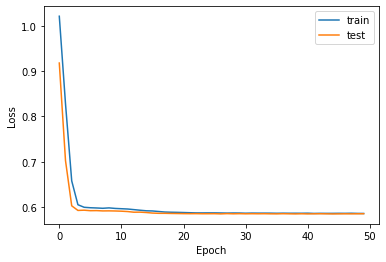

==============minmax===================
MAPE test is : 203.81759
MAPE test invert is : 10.60601
==============zscore===================
MAPE test is : 18825775.46339
MAPE test invert is : 9.11408
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.561
R2 test is : 0.41459


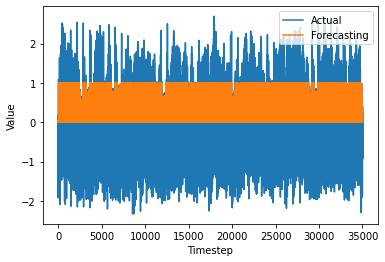

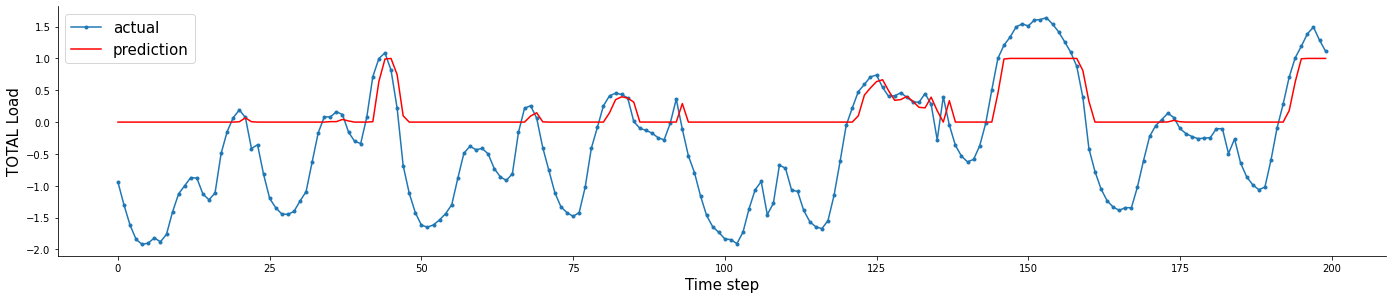

Epoch 1/50
351/351 [==============================] - 13s 11ms/step - loss: 1.0293 - val_loss: 0.9405
Epoch 2/50
351/351 [==============================] - 4s 11ms/step - loss: 0.8641 - val_loss: 0.7446
Epoch 3/50
351/351 [==============================] - 3s 9ms/step - loss: 0.6834 - val_loss: 0.6131
Epoch 4/50
351/351 [==============================] - 3s 9ms/step - loss: 0.6095 - val_loss: 0.5927
Epoch 5/50
351/351 [==============================] - 4s 12ms/step - loss: 0.5996 - val_loss: 0.5924
Epoch 6/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5978 - val_loss: 0.5916
Epoch 7/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5970 - val_loss: 0.5912
Epoch 8/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5968 - val_loss: 0.5906
Epoch 9/50
351/351 [==============================] - 4s 11ms/step - loss: 0.5957 - val_loss: 0.5904
Epoch 10/50
351/351 [==============================] - 4s 11ms/step - loss: 0.5953 - val_loss: 

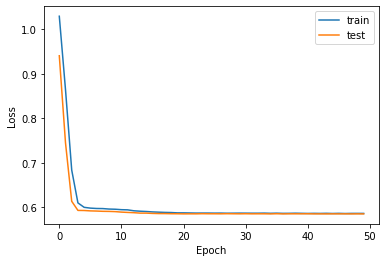

==============minmax===================
MAPE test is : 211.63133
MAPE test invert is : 10.59304
==============zscore===================
MAPE test is : 15070634.67712
MAPE test invert is : 9.09555
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.542
R2 test is : 0.41493


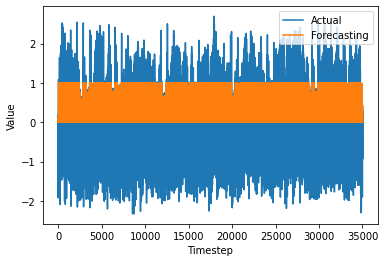

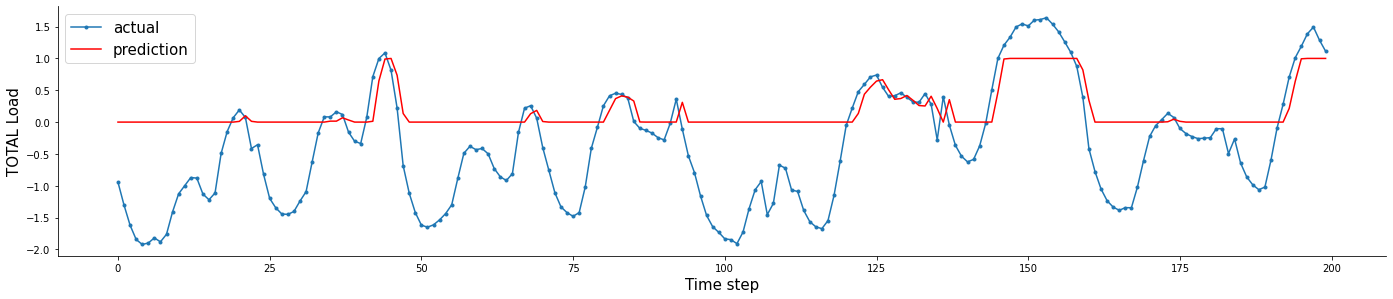

0                   1                   2  \
0  209,47706011191536  210,50515333625933   203,3991696315163   
1  10,595679225755692  10,594136629039681  10,602427873127757   
2  23779440,125287496  15481511,462338539  27436038,076990984   
3   9,099446336882867   9,097677399397355   9,108896874109886   
4   0.764766677442525  0.7647322467607345  0.7648868627286163   
5  3498,7483906634584   3498,590872957657  3499,2982290503755   
6   0,414863849738215  0,4149165355669142  0,4146799236243689   
7                 139                 210                 165   

                    3                   4           nama  
0   203,8175890862048  211,63132777576362        mminmax  
1  10,606011457434843  10,593039855762516  minmax invert  
2   18825775,46339029   15070634,67711975         zscore  
3   9,114084497408772   9,095554596968785  zscpre invert  
4   0.764944404505831    0.76472153700231           rmse  
5  3499,5614782299804  3498,5418766413195    rmse invert  
6  0,4145918540654644  0,4149329231554112             r2  
7                 143                 182          waktu

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto3
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(GRU(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto3") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto3")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto3")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig minmax

Epoch 1/50
351/351 [==============================] - 10s 9ms/step - loss: 0.0413 - val_loss: 0.0395
Epoch 2/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0403 - val_loss: 0.0383
Epoch 3/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0366 - val_loss: 0.0299
Epoch 4/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0242 - val_loss: 0.0094
Epoch 5/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0157 - val_loss: 0.0062
Epoch 6/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0121 - val_loss: 0.0051
Epoch 7/50
351/351 [==============================] - 2s 6ms/step - loss: 0.0100 - val_loss: 0.0051
Epoch 8/50
351/351 [==============================] - 4s 10ms/step - loss: 0.0087 - val_loss: 0.0049
Epoch 9/50
351/351 [==============================] - 2s 6ms/step - loss: 0.0078 - val_loss: 0.0046
Epoch 10/50
351/351 [==============================] - 2s 6ms/step - loss: 0.0073 - val_loss: 0.00

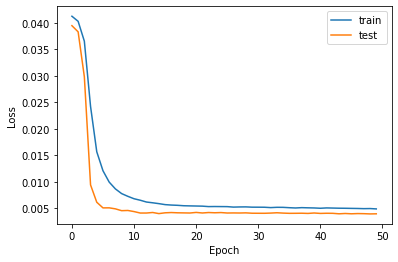

==============minmax===================
MAPE test is : 1354034010073.24585
MAPE test invert is : 3.87331
==============zscore===================
MAPE test is : 12.78762
MAPE test invert is : 3.94036
RMSE Testing is : 0.063
RMSE Testing invert is : 1452.036
R2 test is : 0.89922


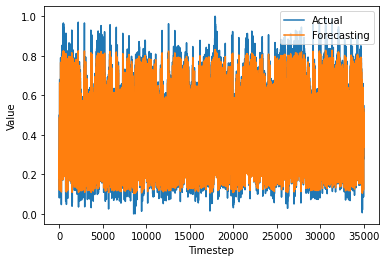

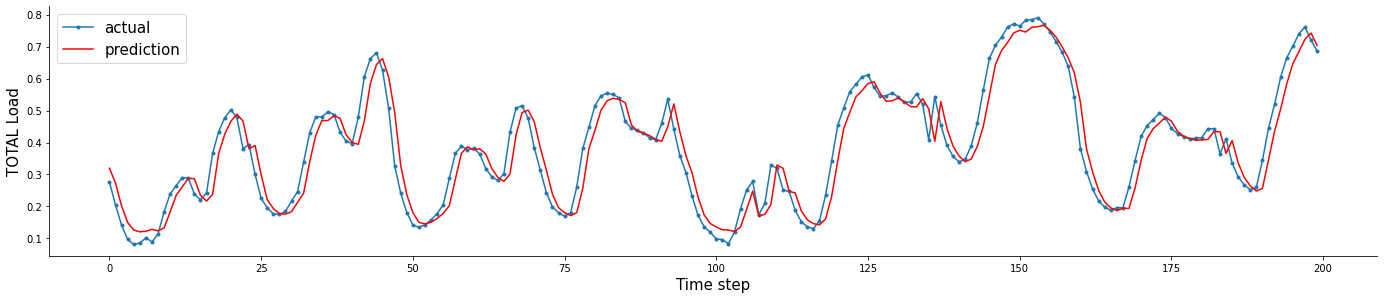

Epoch 1/50
351/351 [==============================] - 10s 9ms/step - loss: 0.0414 - val_loss: 0.0393
Epoch 2/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0399 - val_loss: 0.0378
Epoch 3/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0360 - val_loss: 0.0291
Epoch 4/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0239 - val_loss: 0.0096
Epoch 5/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0152 - val_loss: 0.0063
Epoch 6/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0118 - val_loss: 0.0056
Epoch 7/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0099 - val_loss: 0.0054
Epoch 8/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0087 - val_loss: 0.0049
Epoch 9/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0079 - val_loss: 0.0047
Epoch 10/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0073 - val_loss: 0.004

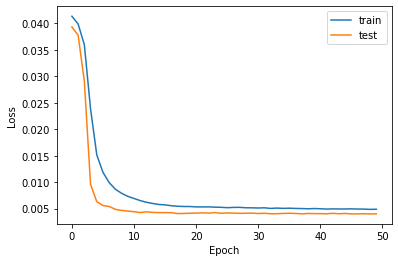

==============minmax===================
MAPE test is : 1059137953640.32385
MAPE test invert is : 3.89667
==============zscore===================
MAPE test is : 12.78815
MAPE test invert is : 3.97187
RMSE Testing is : 0.063
RMSE Testing invert is : 1455.643
R2 test is : 0.89872


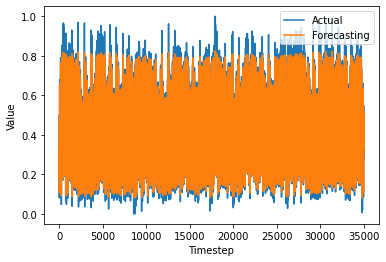

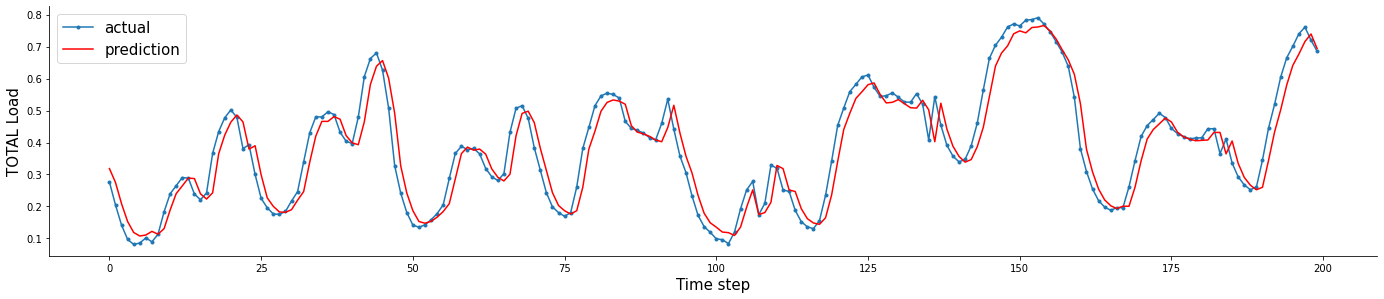

Epoch 1/50
351/351 [==============================] - 11s 10ms/step - loss: 0.0415 - val_loss: 0.0394
Epoch 2/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0397 - val_loss: 0.0379
Epoch 3/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0365 - val_loss: 0.0313
Epoch 4/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0266 - val_loss: 0.0133
Epoch 5/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0169 - val_loss: 0.0071
Epoch 6/50
351/351 [==============================] - 4s 10ms/step - loss: 0.0134 - val_loss: 0.0064
Epoch 7/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0116 - val_loss: 0.0053
Epoch 8/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0102 - val_loss: 0.0048
Epoch 9/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0092 - val_loss: 0.0049
Epoch 10/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0085 - val_loss: 0.

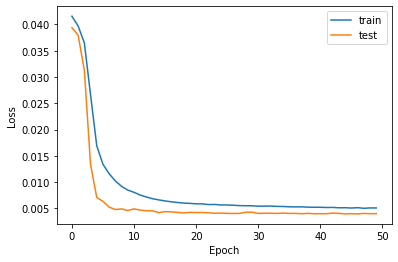

==============minmax===================
MAPE test is : 1455453514940.96973
MAPE test invert is : 3.92140
==============zscore===================
MAPE test is : 12.81179
MAPE test invert is : 3.98923
RMSE Testing is : 0.063
RMSE Testing invert is : 1456.744
R2 test is : 0.89856


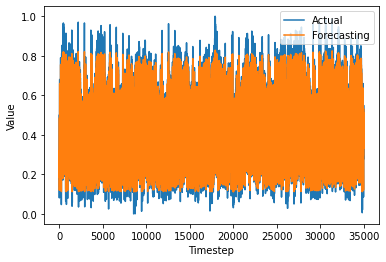

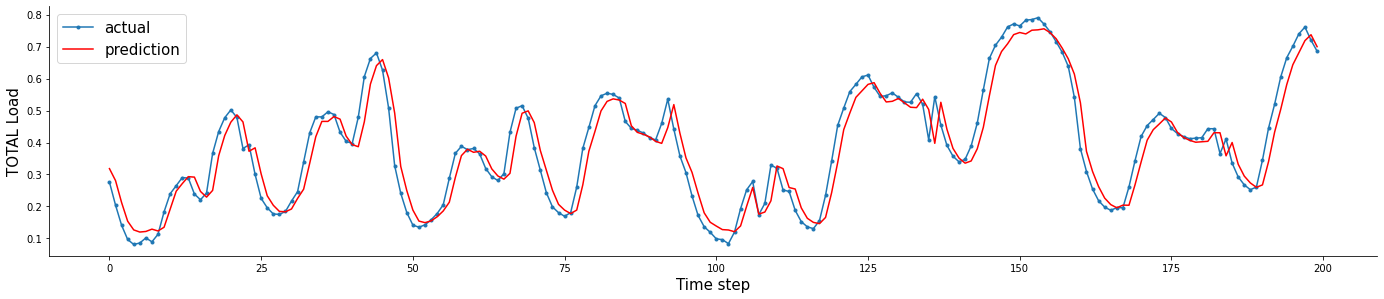

Epoch 1/50
351/351 [==============================] - 10s 12ms/step - loss: 0.0407 - val_loss: 0.0395
Epoch 2/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0399 - val_loss: 0.0389
Epoch 3/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0380 - val_loss: 0.0343
Epoch 4/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0284 - val_loss: 0.0138
Epoch 5/50
351/351 [==============================] - 3s 10ms/step - loss: 0.0168 - val_loss: 0.0064
Epoch 6/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0125 - val_loss: 0.0059
Epoch 7/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0103 - val_loss: 0.0047
Epoch 8/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0089 - val_loss: 0.0046
Epoch 9/50
351/351 [==============================] - 4s 10ms/step - loss: 0.0081 - val_loss: 0.0049
Epoch 10/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0073 - val_loss: 0.

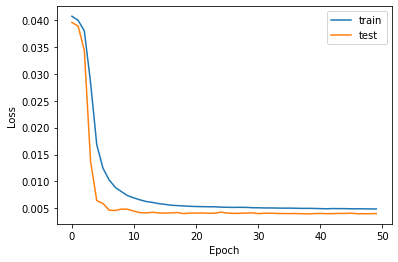

==============minmax===================
MAPE test is : 1048895919787.29529
MAPE test invert is : 3.94518
==============zscore===================
MAPE test is : 12.78905
MAPE test invert is : 4.00778
RMSE Testing is : 0.063
RMSE Testing invert is : 1458.011
R2 test is : 0.89839


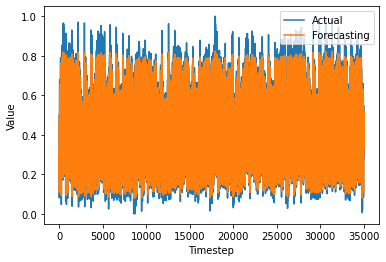

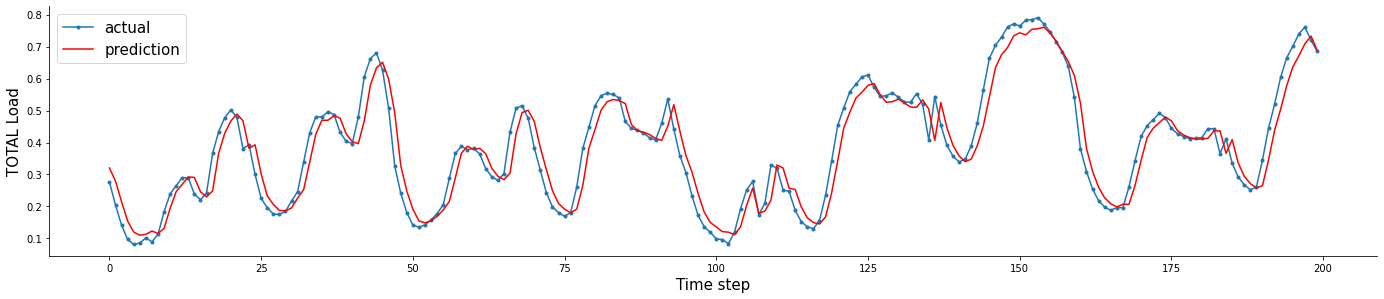

Epoch 1/50
351/351 [==============================] - 10s 11ms/step - loss: 0.0409 - val_loss: 0.0395
Epoch 2/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0399 - val_loss: 0.0384
Epoch 3/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0368 - val_loss: 0.0311
Epoch 4/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0259 - val_loss: 0.0111
Epoch 5/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0169 - val_loss: 0.0067
Epoch 6/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0131 - val_loss: 0.0052
Epoch 7/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0108 - val_loss: 0.0049
Epoch 8/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0094 - val_loss: 0.0048
Epoch 9/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0085 - val_loss: 0.0045
Epoch 10/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0079 - val_loss: 0.00

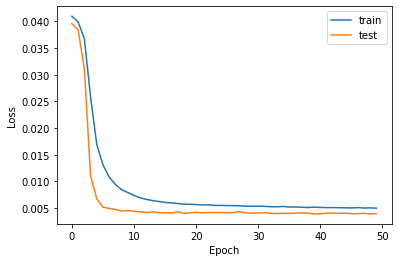

==============minmax===================
MAPE test is : 917453609653.65869
MAPE test invert is : 3.91237
==============zscore===================
MAPE test is : 12.62761
MAPE test invert is : 3.95408
RMSE Testing is : 0.063
RMSE Testing invert is : 1444.819
R2 test is : 0.90022


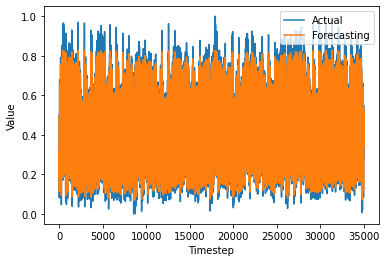

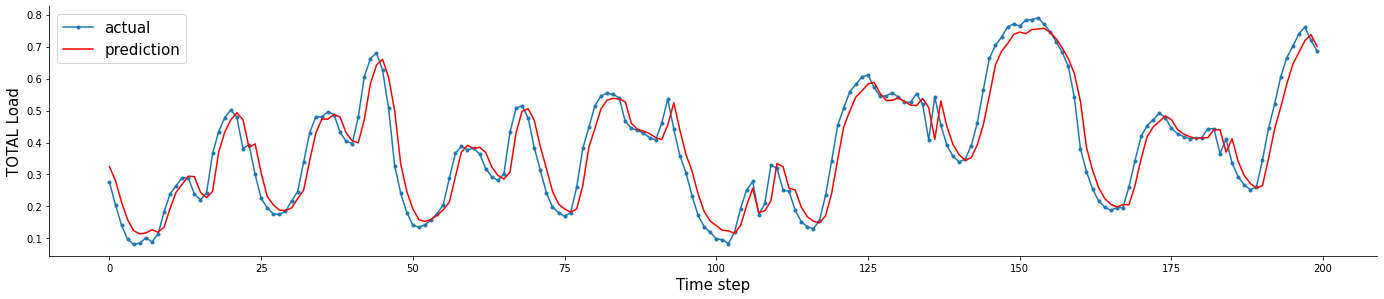

0                    1                   2  \
0   1354034010073,2458   1059137953640,3239  1455453514940,9697   
1    3,873312934675724   3,8966650712970177  3,9214002880521956   
2   12,787620807428441   12,788145187229466   12,81178669835329   
3    3,940362860583402   3,9718735141693906   3,989230955935245   
4  0.06320346459340759  0.06336046151147694  0.0634083668018184   
5   1452,0363955689459   1455,6432427646712  1456,7438189049756   
6   0,8992171788803847   0,8987158695293673  0,8985626547383847   
7                  133                  141                 209   

                     3                    4           nama  
0   1048895919787,2953    917453609653,6587        mminmax  
1    3,945177288465122    3,912372661388773  minmax invert  
2   12,789046296657125   12,627611155315355         zscore  
3    4,007775446914195   3,9540771509457966  zscpre invert  
4  0.06346354107347495  0.06288932691989338           rmse  
5   1458,0113926220133   1444,8193966576303    rmse invert  
6    0,898386048183095   0,9002165229110176             r2  
7                  143                  149          waktu

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto4
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(GRU(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')




  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto4") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto4")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto4")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

# 5 run random

## tanh minmax

mkdir: cannot create directory ‘foto5’: File exists
Epoch 1/63
36/36 [==============================] - 9s 49ms/step - loss: 0.0389 - val_loss: 0.0355
Epoch 2/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0284 - val_loss: 0.0167
Epoch 3/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0090 - val_loss: 0.0040
Epoch 4/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0052 - val_loss: 0.0040
Epoch 5/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 6/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 7/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 8/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 9/63
36/36 [==============================] - 1s 18ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 10/63
36/36 [==============================] - 1s 1

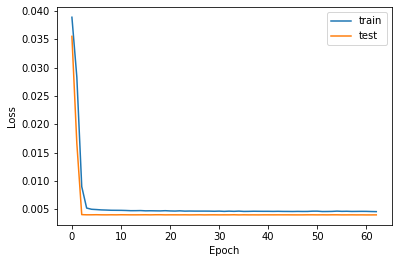

==============minmax===================
MAPE test is : 1467994178360.41748
MAPE test invert is : 3.92904
==============zscore===================
MAPE test is : 12.84211
MAPE test invert is : 3.95820
RMSE Testing is : 0.063
RMSE Testing invert is : 1452.832
R2 test is : 0.89911


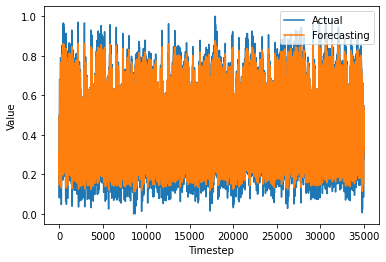

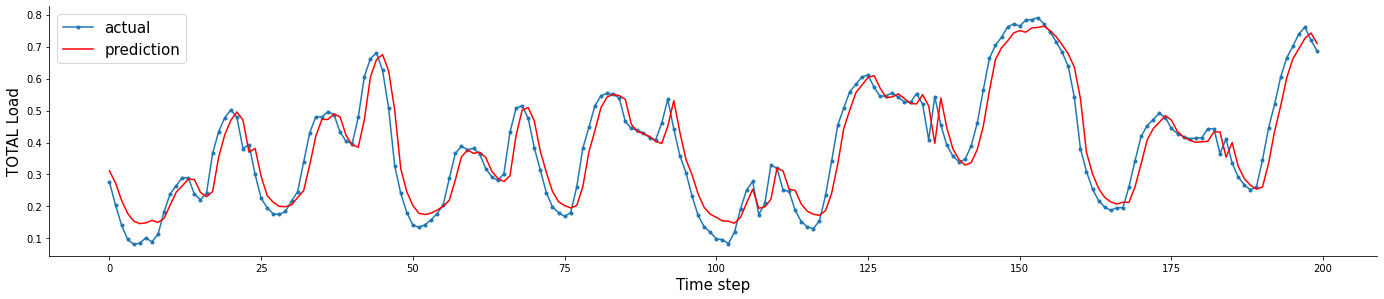

Epoch 1/63
36/36 [==============================] - 10s 39ms/step - loss: 0.0387 - val_loss: 0.0349
Epoch 2/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0275 - val_loss: 0.0157
Epoch 3/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0086 - val_loss: 0.0041
Epoch 4/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0053 - val_loss: 0.0040
Epoch 5/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 6/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 7/63
36/36 [==============================] - 1s 22ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 8/63
36/36 [==============================] - 1s 24ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 9/63
36/36 [==============================] - 1s 22ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 10/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 11

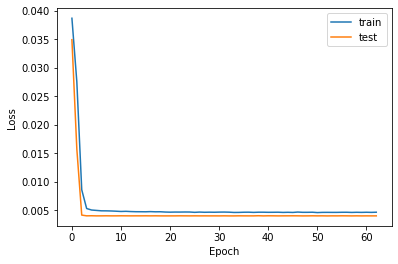

==============minmax===================
MAPE test is : 1474132516203.59644
MAPE test invert is : 3.93687
==============zscore===================
MAPE test is : 12.85201
MAPE test invert is : 3.96499
RMSE Testing is : 0.063
RMSE Testing invert is : 1452.628
R2 test is : 0.89914


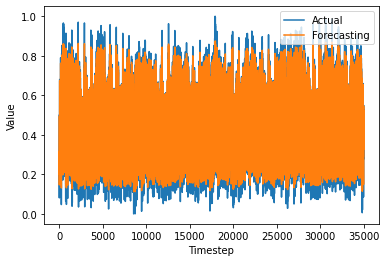

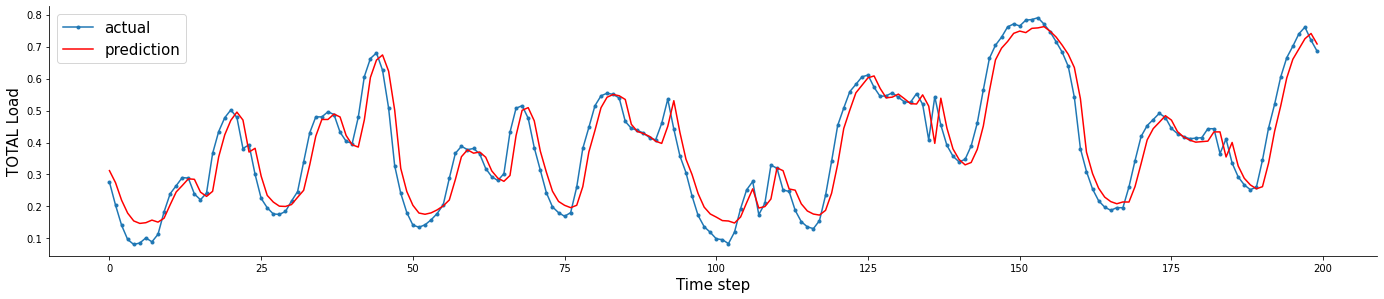

Epoch 1/63
36/36 [==============================] - 8s 37ms/step - loss: 0.0389 - val_loss: 0.0355
Epoch 2/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0288 - val_loss: 0.0177
Epoch 3/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0097 - val_loss: 0.0041
Epoch 4/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0053 - val_loss: 0.0040
Epoch 5/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 6/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 7/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 8/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 9/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 10/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 11/

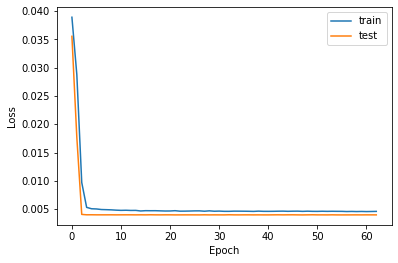

==============minmax===================
MAPE test is : 1479553275192.42847
MAPE test invert is : 3.93899
==============zscore===================
MAPE test is : 12.85538
MAPE test invert is : 3.96641
RMSE Testing is : 0.063
RMSE Testing invert is : 1452.630
R2 test is : 0.89913


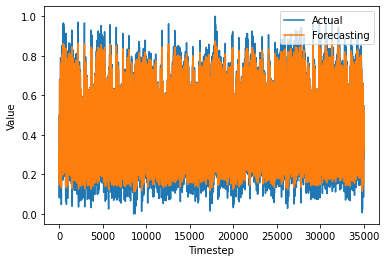

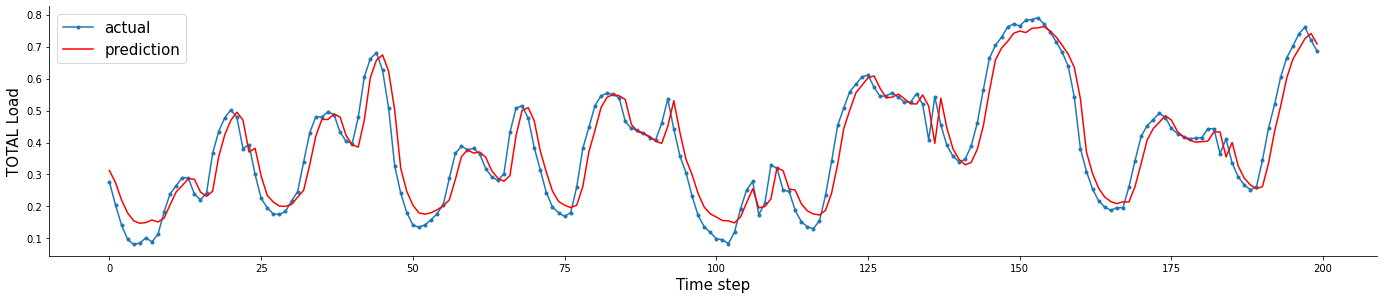

Epoch 1/63
36/36 [==============================] - 9s 41ms/step - loss: 0.0387 - val_loss: 0.0352
Epoch 2/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0281 - val_loss: 0.0164
Epoch 3/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0088 - val_loss: 0.0041
Epoch 4/63
36/36 [==============================] - 1s 18ms/step - loss: 0.0053 - val_loss: 0.0040
Epoch 5/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 6/63
36/36 [==============================] - 1s 21ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 7/63
36/36 [==============================] - 1s 25ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 8/63
36/36 [==============================] - 1s 25ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 9/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 10/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 11/

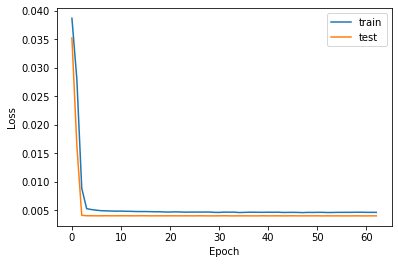

==============minmax===================
MAPE test is : 1485518401041.23584
MAPE test invert is : 3.94402
==============zscore===================
MAPE test is : 12.84709
MAPE test invert is : 3.96726
RMSE Testing is : 0.063
RMSE Testing invert is : 1452.441
R2 test is : 0.89916


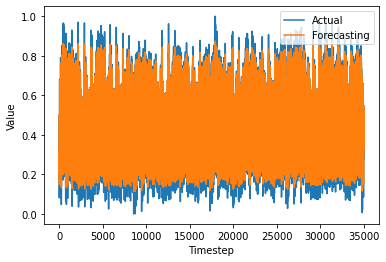

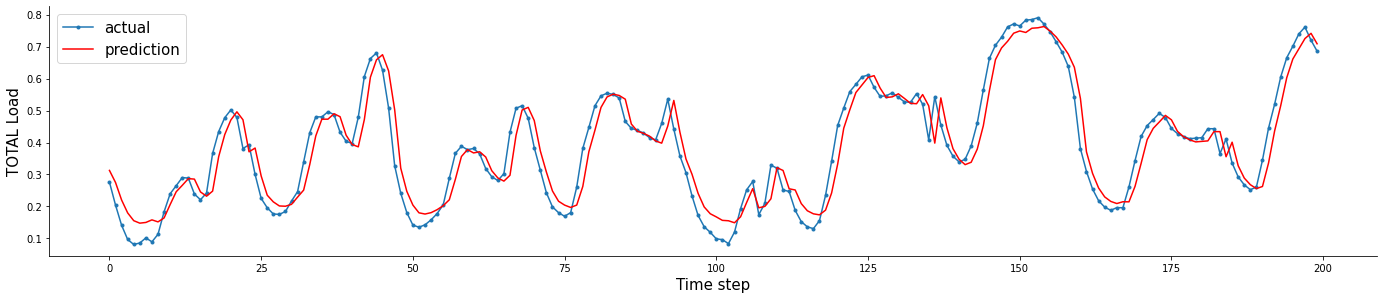

Epoch 1/63
36/36 [==============================] - 8s 39ms/step - loss: 0.0387 - val_loss: 0.0351
Epoch 2/63
36/36 [==============================] - 1s 19ms/step - loss: 0.0277 - val_loss: 0.0157
Epoch 3/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0085 - val_loss: 0.0040
Epoch 4/63
36/36 [==============================] - 1s 20ms/step - loss: 0.0051 - val_loss: 0.0041
Epoch 5/63
36/36 [==============================] - 1s 24ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 6/63
36/36 [==============================] - 1s 25ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 7/63
36/36 [==============================] - 1s 18ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 8/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 9/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 10/63
36/36 [==============================] - 1s 18ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 11/

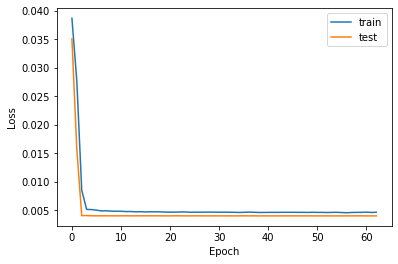

==============minmax===================
MAPE test is : 1489271167825.40698
MAPE test invert is : 3.94162
==============zscore===================
MAPE test is : 12.84572
MAPE test invert is : 3.96481
RMSE Testing is : 0.063
RMSE Testing invert is : 1452.336
R2 test is : 0.89918


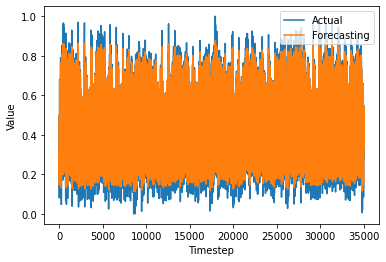

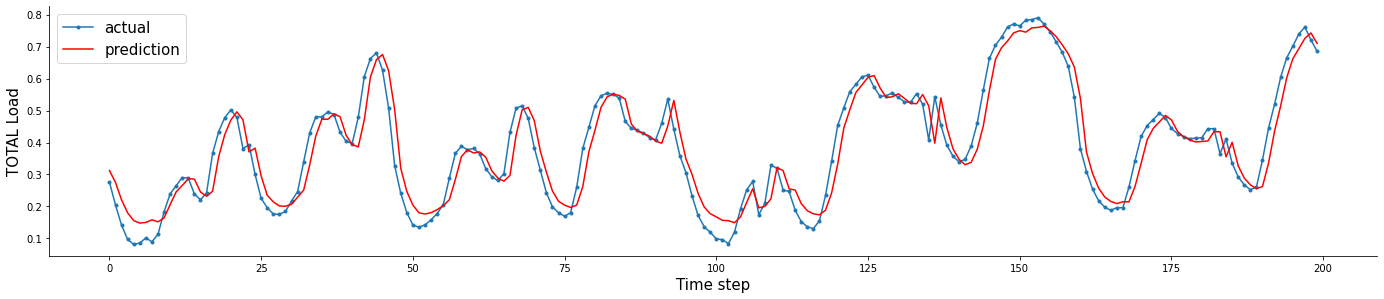

0                    1                    2  \
0   1467994178360,4175   1474132516203,5964   1479553275192,4285   
1   3,9290427032452175   3,9368719167908295    3,938987615598489   
2   12,842106815740554   12,852005484510354   12,855381928547017   
3    3,958203297579846   3,9649869517784264   3,9664052309710534   
4  0.06323811263805487  0.06322919715593314  0.06322930575581442   
5   1452,8323997466728   1452,6275754604076   1452,6300704340804   
6   0,8991066506097252   0,8991350970451826   0,8991347505620264   
7                   48                   49                   45   

                     3                    4           nama  
0   1485518401041,2358    1489271167825,407        mminmax  
1   3,9440169008166257    3,941620523488117  minmax invert  
2    12,84709494038273    12,84571630623553         zscore  
3   3,9672611316127337    3,964810044846897  zscpre invert  
4  0.06322106525625654  0.06321650307642061           rmse  
5   1452,4407531972377    1452,335941677687    rmse invert  
6   0,8991610398236519   0,8991755928486587             r2  
7                   90                   52          waktu

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto5
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network LSTM
  #design network GRU
  model = Sequential()
  model.add(GRU(31, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 31, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 31, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=63, batch_size=1000, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start
  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto5") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]


  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto5")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto5")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## tanh zscore

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto6
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network GRU
  model = Sequential()
  model.add(GRU(31, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  # model.add(Dropout(0.2))

  model.add(GRU(units = 31, return_sequences = True, activation='tanh'))
  # model.add(Dropout(0.2))

  model.add(GRU(units = 31, return_sequences = True, activation='tanh'))
  # model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=63, batch_size=1000, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start
  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto6") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto6")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto6")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

mkdir: cannot create directory ‘foto6’: File exists
Epoch 1/63
35/35 [==============================] - 11s 47ms/step - loss: 1.1863 - val_loss: 1.0653
Epoch 2/63
35/35 [==============================] - 1s 20ms/step - loss: 0.8805 - val_loss: 0.7205
Epoch 3/63
35/35 [==============================] - 1s 20ms/step - loss: 0.6761 - val_loss: 0.6487
Epoch 4/63
35/35 [==============================] - 1s 19ms/step - loss: 0.6351 - val_loss: 0.6203
Epoch 5/63
35/35 [==============================] - 1s 19ms/step - loss: 0.6112 - val_loss: 0.6018
Epoch 6/63
35/35 [==============================] - 1s 20ms/step - loss: 0.5974 - val_loss: 0.5940
Epoch 7/63
35/35 [==============================] - 1s 20ms/step - loss: 0.5924 - val_loss: 0.5912
Epoch 8/63
35/35 [==============================] - 1s 24ms/step - loss: 0.5907 - val_loss: 0.5901
Epoch 9/63
35/35 [==============================] - 1s 36ms/step - loss: 0.5899 - val_loss: 0.5895
Epoch 10/63
35/35 [==============================] - 1s 

## sig zscore

Epoch 1/63
36/36 [==============================] - 9s 41ms/step - loss: 1.1495 - val_loss: 1.0787
Epoch 2/63
36/36 [==============================] - 1s 14ms/step - loss: 1.0525 - val_loss: 1.0192
Epoch 3/63
36/36 [==============================] - 1s 15ms/step - loss: 1.0115 - val_loss: 0.9967
Epoch 4/63
36/36 [==============================] - 1s 15ms/step - loss: 0.9948 - val_loss: 0.9871
Epoch 5/63
36/36 [==============================] - 1s 16ms/step - loss: 0.9854 - val_loss: 0.9808
Epoch 6/63
36/36 [==============================] - 1s 16ms/step - loss: 0.9794 - val_loss: 0.9738
Epoch 7/63
36/36 [==============================] - 1s 17ms/step - loss: 0.9716 - val_loss: 0.9640
Epoch 8/63
36/36 [==============================] - 1s 16ms/step - loss: 0.9608 - val_loss: 0.9492
Epoch 9/63
36/36 [==============================] - 1s 15ms/step - loss: 0.9443 - val_loss: 0.9271
Epoch 10/63
36/36 [==============================] - 1s 16ms/step - loss: 0.9195 - val_loss: 0.8952
Epoch 11/

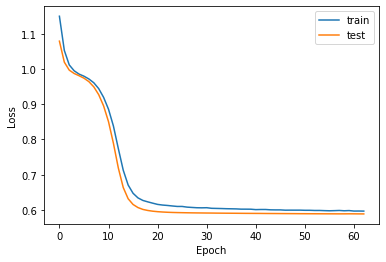

==============minmax===================
MAPE test is : 202.32927
MAPE test invert is : 10.68025
==============zscore===================
MAPE test is : 44787.70534
MAPE test invert is : 9.17682
RMSE Testing is : 0.767
RMSE Testing invert is : 3510.562
R2 test is : 0.41091


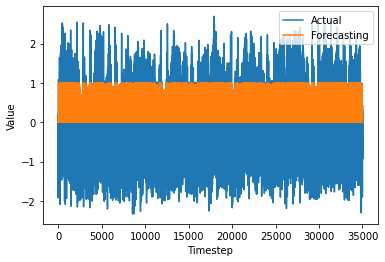

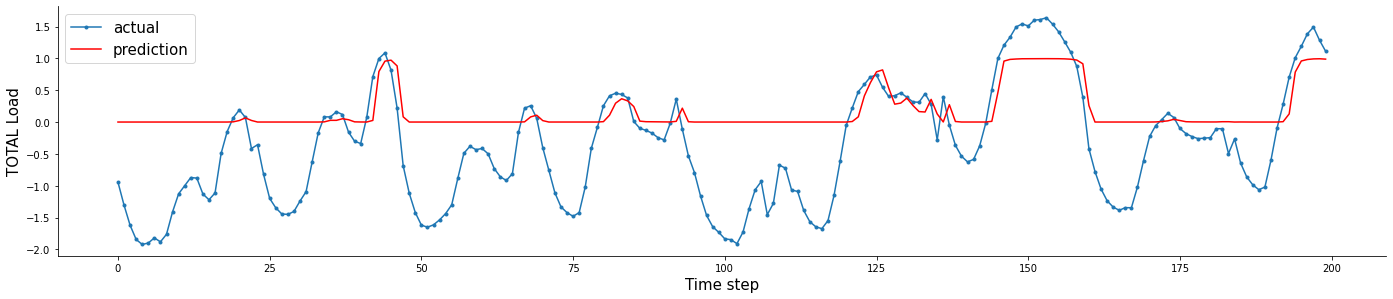

Epoch 1/63
36/36 [==============================] - 10s 41ms/step - loss: 1.0985 - val_loss: 1.0497
Epoch 2/63
36/36 [==============================] - 1s 17ms/step - loss: 1.0317 - val_loss: 1.0095
Epoch 3/63
36/36 [==============================] - 1s 17ms/step - loss: 1.0046 - val_loss: 0.9937
Epoch 4/63
36/36 [==============================] - 1s 36ms/step - loss: 0.9921 - val_loss: 0.9861
Epoch 5/63
36/36 [==============================] - 1s 40ms/step - loss: 0.9843 - val_loss: 0.9795
Epoch 6/63
36/36 [==============================] - 1s 38ms/step - loss: 0.9767 - val_loss: 0.9707
Epoch 7/63
36/36 [==============================] - 1s 38ms/step - loss: 0.9670 - val_loss: 0.9578
Epoch 8/63
36/36 [==============================] - 1s 34ms/step - loss: 0.9526 - val_loss: 0.9387
Epoch 9/63
36/36 [==============================] - 1s 40ms/step - loss: 0.9314 - val_loss: 0.9110
Epoch 10/63
36/36 [==============================] - 1s 34ms/step - loss: 0.9011 - val_loss: 0.8709
Epoch 11

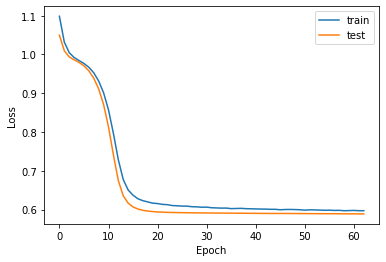

==============minmax===================
MAPE test is : 206.20083
MAPE test invert is : 10.68256
==============zscore===================
MAPE test is : 50659.90113
MAPE test invert is : 9.17731
RMSE Testing is : 0.767
RMSE Testing invert is : 3511.080
R2 test is : 0.41073


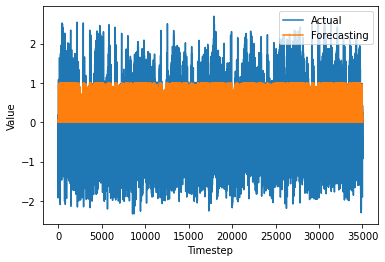

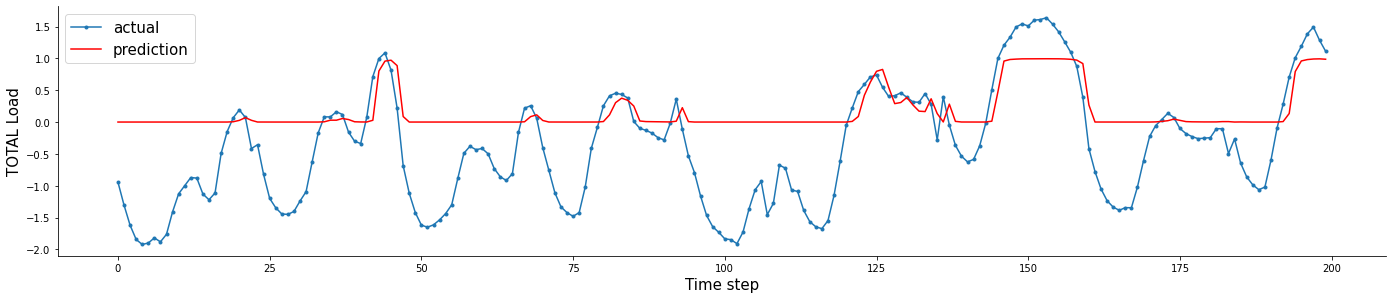

Epoch 1/63
36/36 [==============================] - 10s 81ms/step - loss: 1.3404 - val_loss: 1.2154
Epoch 2/63
36/36 [==============================] - 1s 16ms/step - loss: 1.1406 - val_loss: 1.0585
Epoch 3/63
36/36 [==============================] - 1s 16ms/step - loss: 1.0334 - val_loss: 1.0015
Epoch 4/63
36/36 [==============================] - 1s 16ms/step - loss: 0.9979 - val_loss: 0.9844
Epoch 5/63
36/36 [==============================] - 1s 21ms/step - loss: 0.9856 - val_loss: 0.9764
Epoch 6/63
36/36 [==============================] - 1s 25ms/step - loss: 0.9780 - val_loss: 0.9692
Epoch 7/63
36/36 [==============================] - 1s 22ms/step - loss: 0.9704 - val_loss: 0.9611
Epoch 8/63
36/36 [==============================] - 1s 17ms/step - loss: 0.9621 - val_loss: 0.9510
Epoch 9/63
36/36 [==============================] - 1s 17ms/step - loss: 0.9519 - val_loss: 0.9384
Epoch 10/63
36/36 [==============================] - 1s 16ms/step - loss: 0.9402 - val_loss: 0.9228
Epoch 11

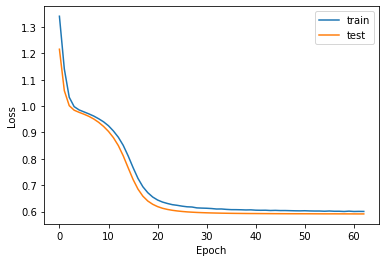

==============minmax===================
MAPE test is : 188.80949
MAPE test invert is : 10.73270
==============zscore===================
MAPE test is : 26680.62141
MAPE test invert is : 9.23344
RMSE Testing is : 0.769
RMSE Testing invert is : 3518.277
R2 test is : 0.40831


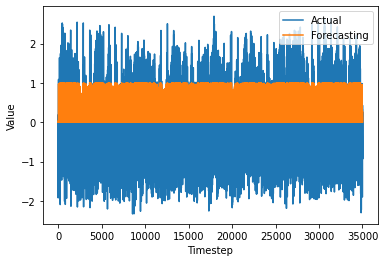

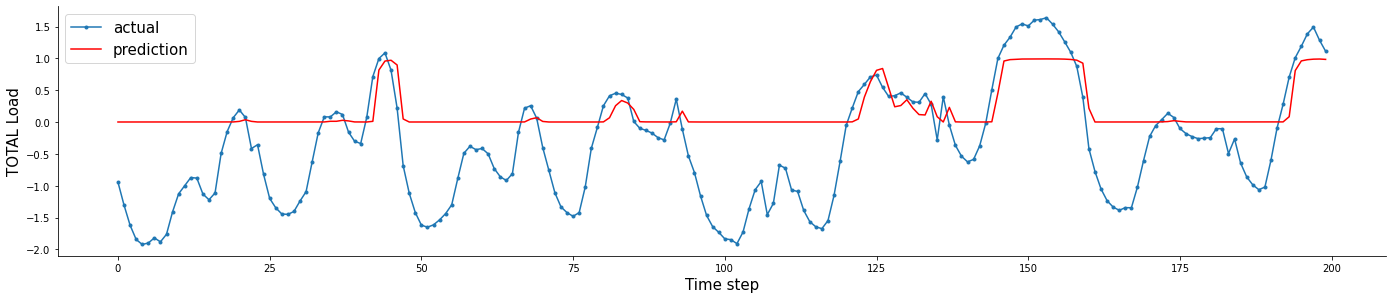

Epoch 1/63
36/36 [==============================] - 10s 39ms/step - loss: 1.1603 - val_loss: 1.0842
Epoch 2/63
36/36 [==============================] - 1s 16ms/step - loss: 1.0541 - val_loss: 1.0193
Epoch 3/63
36/36 [==============================] - 1s 17ms/step - loss: 1.0123 - val_loss: 0.9967
Epoch 4/63
36/36 [==============================] - 1s 17ms/step - loss: 0.9953 - val_loss: 0.9877
Epoch 5/63
36/36 [==============================] - 1s 17ms/step - loss: 0.9867 - val_loss: 0.9819
Epoch 6/63
36/36 [==============================] - 1s 17ms/step - loss: 0.9813 - val_loss: 0.9760
Epoch 7/63
36/36 [==============================] - 1s 26ms/step - loss: 0.9739 - val_loss: 0.9678
Epoch 8/63
36/36 [==============================] - 1s 25ms/step - loss: 0.9655 - val_loss: 0.9562
Epoch 9/63
36/36 [==============================] - 1s 20ms/step - loss: 0.9529 - val_loss: 0.9392
Epoch 10/63
36/36 [==============================] - 1s 16ms/step - loss: 0.9341 - val_loss: 0.9146
Epoch 11

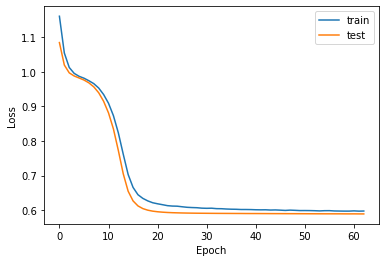

==============minmax===================
MAPE test is : 202.36924
MAPE test invert is : 10.68684
==============zscore===================
MAPE test is : 42682.12478
MAPE test invert is : 9.18243
RMSE Testing is : 0.768
RMSE Testing invert is : 3511.389
R2 test is : 0.41063


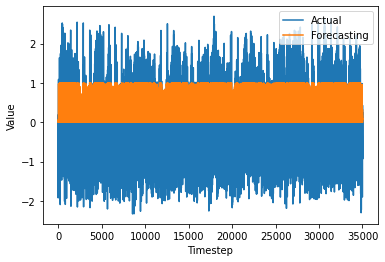

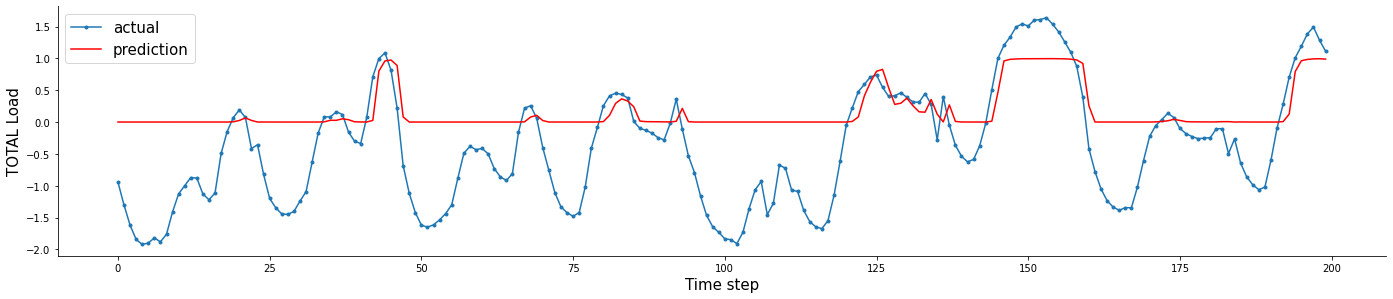

Epoch 1/63
36/36 [==============================] - 11s 49ms/step - loss: 1.1804 - val_loss: 1.1009
Epoch 2/63
36/36 [==============================] - 1s 26ms/step - loss: 1.0672 - val_loss: 1.0282
Epoch 3/63
36/36 [==============================] - 1s 17ms/step - loss: 1.0179 - val_loss: 1.0002
Epoch 4/63
36/36 [==============================] - 1s 18ms/step - loss: 0.9974 - val_loss: 0.9881
Epoch 5/63
36/36 [==============================] - 1s 21ms/step - loss: 0.9864 - val_loss: 0.9800
Epoch 6/63
36/36 [==============================] - 1s 19ms/step - loss: 0.9777 - val_loss: 0.9707
Epoch 7/63
36/36 [==============================] - 1s 18ms/step - loss: 0.9669 - val_loss: 0.9572
Epoch 8/63
36/36 [==============================] - 1s 19ms/step - loss: 0.9511 - val_loss: 0.9366
Epoch 9/63
36/36 [==============================] - 1s 18ms/step - loss: 0.9272 - val_loss: 0.9058
Epoch 10/63
36/36 [==============================] - 1s 24ms/step - loss: 0.8936 - val_loss: 0.8621
Epoch 11

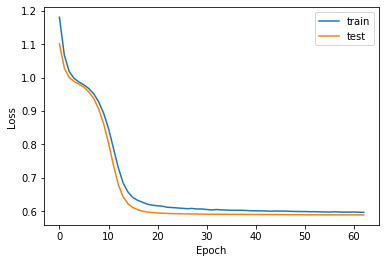

==============minmax===================
MAPE test is : 206.50365
MAPE test invert is : 10.68029
==============zscore===================
MAPE test is : 51080.45470
MAPE test invert is : 9.17487
RMSE Testing is : 0.767
RMSE Testing invert is : 3510.619
R2 test is : 0.41089


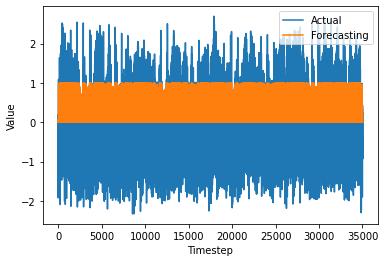

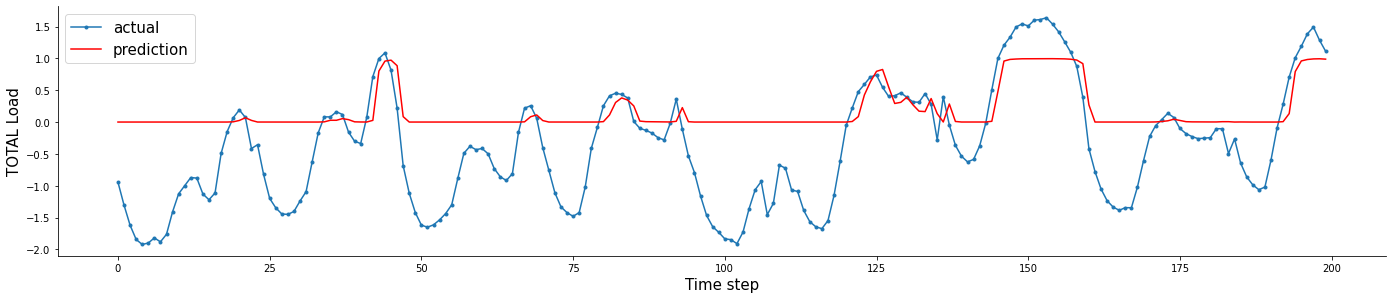

Epoch 1/63
36/36 [==============================] - 11s 49ms/step - loss: 1.1586 - val_loss: 1.0841
Epoch 2/63
36/36 [==============================] - 1s 18ms/step - loss: 1.0537 - val_loss: 1.0181
Epoch 3/63
36/36 [==============================] - 1s 19ms/step - loss: 1.0098 - val_loss: 0.9960
Epoch 4/63
36/36 [==============================] - 1s 18ms/step - loss: 0.9940 - val_loss: 0.9874
Epoch 5/63
36/36 [==============================] - 1s 18ms/step - loss: 0.9869 - val_loss: 0.9818
Epoch 6/63
36/36 [==============================] - 1s 19ms/step - loss: 0.9807 - val_loss: 0.9758
Epoch 7/63
36/36 [==============================] - 1s 25ms/step - loss: 0.9747 - val_loss: 0.9677
Epoch 8/63
36/36 [==============================] - 1s 27ms/step - loss: 0.9655 - val_loss: 0.9565
Epoch 9/63
36/36 [==============================] - 1s 20ms/step - loss: 0.9534 - val_loss: 0.9413
Epoch 10/63
36/36 [==============================] - 1s 19ms/step - loss: 0.9379 - val_loss: 0.9213
Epoch 11

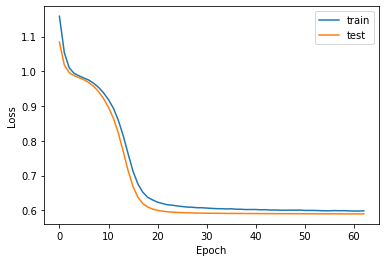

==============minmax===================
MAPE test is : 200.46968
MAPE test invert is : 10.69684
==============zscore===================
MAPE test is : 42219.63992
MAPE test invert is : 9.19304
RMSE Testing is : 0.768
RMSE Testing invert is : 3512.826
R2 test is : 0.41015


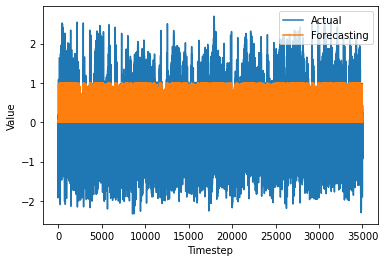

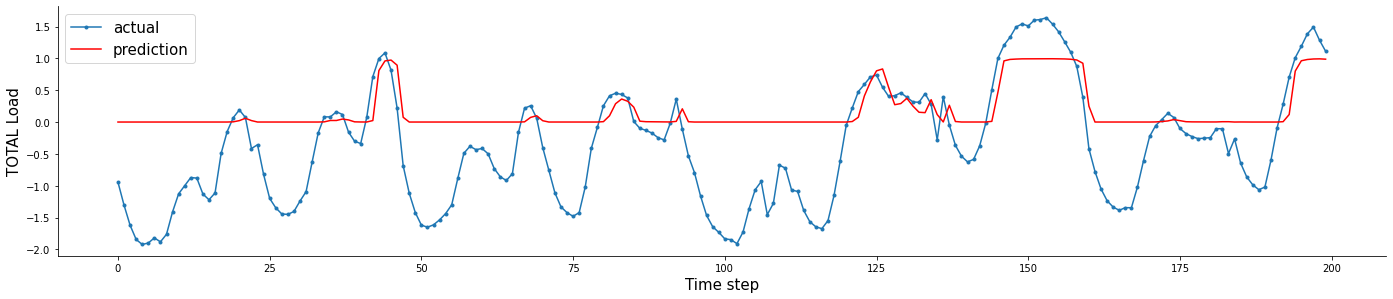

Epoch 1/63
36/36 [==============================] - 8s 39ms/step - loss: 1.2223 - val_loss: 1.1249
Epoch 2/63
36/36 [==============================] - 1s 18ms/step - loss: 1.0790 - val_loss: 1.0282
Epoch 3/63
36/36 [==============================] - 1s 24ms/step - loss: 1.0154 - val_loss: 0.9953
Epoch 4/63
36/36 [==============================] - 1s 17ms/step - loss: 0.9927 - val_loss: 0.9840
Epoch 5/63
36/36 [==============================] - 1s 18ms/step - loss: 0.9832 - val_loss: 0.9770
Epoch 6/63
36/36 [==============================] - 1s 16ms/step - loss: 0.9764 - val_loss: 0.9694
Epoch 7/63
36/36 [==============================] - 1s 16ms/step - loss: 0.9673 - val_loss: 0.9587
Epoch 8/63
36/36 [==============================] - 1s 17ms/step - loss: 0.9555 - val_loss: 0.9432
Epoch 9/63
36/36 [==============================] - 1s 23ms/step - loss: 0.9384 - val_loss: 0.9213
Epoch 10/63
36/36 [==============================] - 1s 23ms/step - loss: 0.9161 - val_loss: 0.8928
Epoch 11/

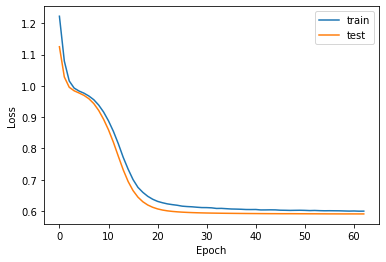

==============minmax===================
MAPE test is : 192.68436
MAPE test invert is : 10.71702
==============zscore===================
MAPE test is : 37926.06921
MAPE test invert is : 9.21685
RMSE Testing is : 0.768
RMSE Testing invert is : 3515.600
R2 test is : 0.40921


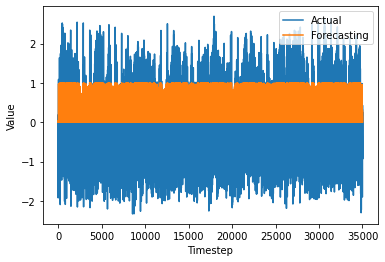

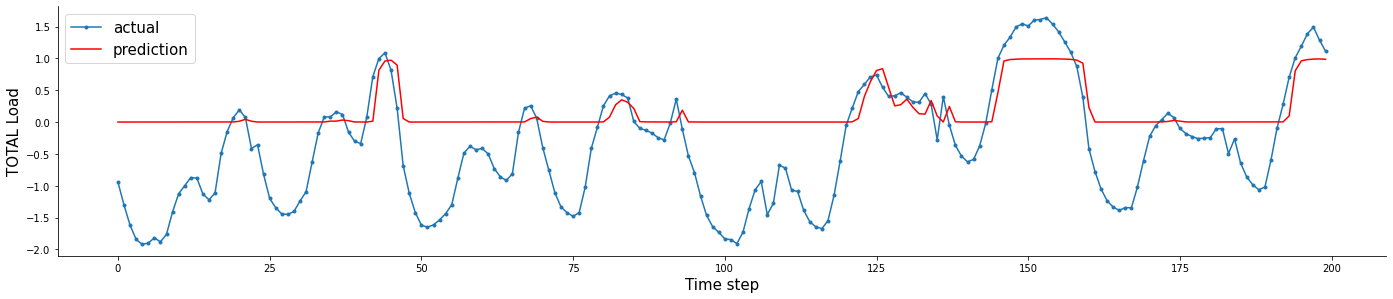

Epoch 1/63
36/36 [==============================] - 12s 53ms/step - loss: 1.1650 - val_loss: 1.0833
Epoch 2/63
36/36 [==============================] - 1s 28ms/step - loss: 1.0501 - val_loss: 1.0119
Epoch 3/63
36/36 [==============================] - 1s 17ms/step - loss: 1.0034 - val_loss: 0.9894
Epoch 4/63
36/36 [==============================] - 1s 18ms/step - loss: 0.9881 - val_loss: 0.9805
Epoch 5/63
36/36 [==============================] - 1s 17ms/step - loss: 0.9796 - val_loss: 0.9735
Epoch 6/63
36/36 [==============================] - 1s 18ms/step - loss: 0.9720 - val_loss: 0.9646
Epoch 7/63
36/36 [==============================] - 1s 18ms/step - loss: 0.9618 - val_loss: 0.9520
Epoch 8/63
36/36 [==============================] - 1s 19ms/step - loss: 0.9481 - val_loss: 0.9341
Epoch 9/63
36/36 [==============================] - 1s 19ms/step - loss: 0.9295 - val_loss: 0.9098
Epoch 10/63
36/36 [==============================] - 1s 19ms/step - loss: 0.9049 - val_loss: 0.8773
Epoch 11

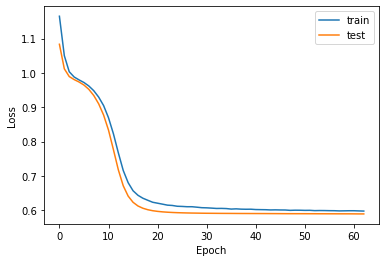

==============minmax===================
MAPE test is : 202.75467
MAPE test invert is : 10.69114
==============zscore===================
MAPE test is : 42857.63646
MAPE test invert is : 9.18653
RMSE Testing is : 0.768
RMSE Testing invert is : 3512.055
R2 test is : 0.41040


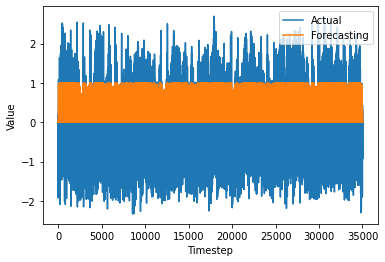

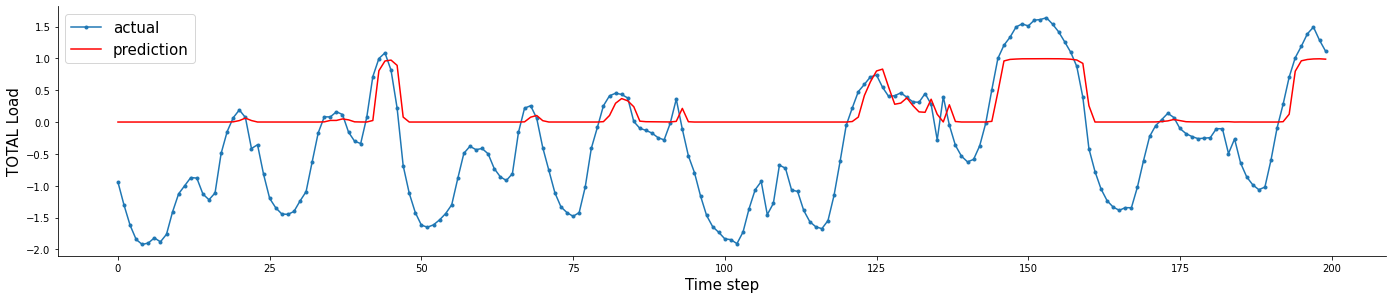

Epoch 1/63
36/36 [==============================] - 10s 42ms/step - loss: 1.2947 - val_loss: 1.1956
Epoch 2/63
36/36 [==============================] - 1s 19ms/step - loss: 1.1310 - val_loss: 1.0604
Epoch 3/63
36/36 [==============================] - 1s 19ms/step - loss: 1.0333 - val_loss: 1.0016
Epoch 4/63
36/36 [==============================] - 1s 19ms/step - loss: 0.9981 - val_loss: 0.9850
Epoch 5/63
36/36 [==============================] - 1s 18ms/step - loss: 0.9864 - val_loss: 0.9773
Epoch 6/63
36/36 [==============================] - 1s 19ms/step - loss: 0.9794 - val_loss: 0.9702
Epoch 7/63
36/36 [==============================] - 1s 26ms/step - loss: 0.9708 - val_loss: 0.9618
Epoch 8/63
36/36 [==============================] - 1s 26ms/step - loss: 0.9629 - val_loss: 0.9513
Epoch 9/63
36/36 [==============================] - 1s 22ms/step - loss: 0.9526 - val_loss: 0.9381
Epoch 10/63
36/36 [==============================] - 1s 20ms/step - loss: 0.9386 - val_loss: 0.9213
Epoch 11

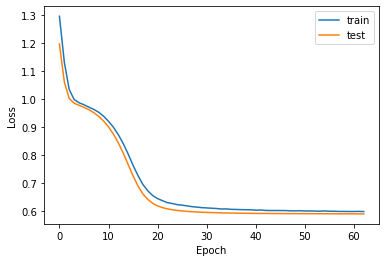

==============minmax===================
MAPE test is : 199.01714
MAPE test invert is : 10.71051
==============zscore===================
MAPE test is : 34348.64258
MAPE test invert is : 9.20760
RMSE Testing is : 0.768
RMSE Testing invert is : 3515.282
R2 test is : 0.40932


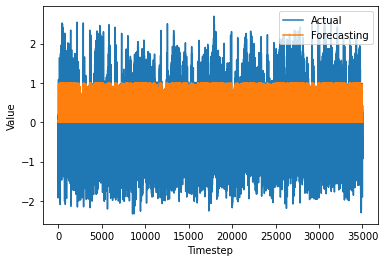

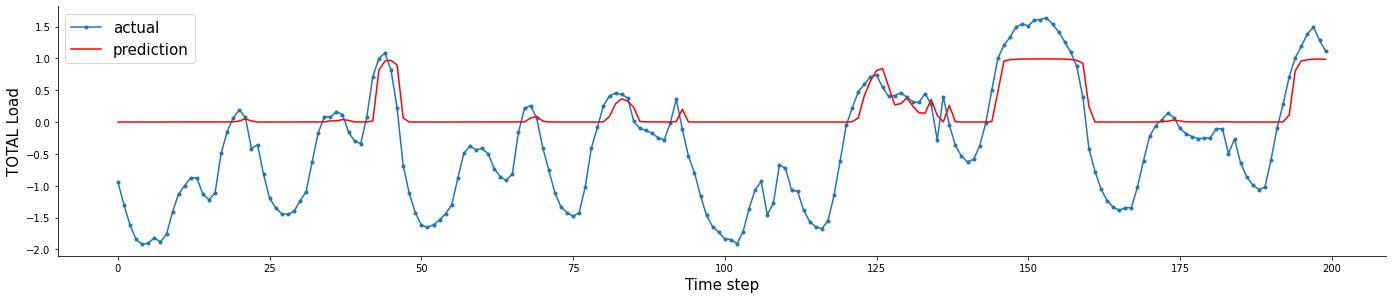

Epoch 1/63
36/36 [==============================] - 8s 38ms/step - loss: 1.1913 - val_loss: 1.1090
Epoch 2/63
36/36 [==============================] - 1s 17ms/step - loss: 1.0682 - val_loss: 1.0253
Epoch 3/63
36/36 [==============================] - 1s 17ms/step - loss: 1.0127 - val_loss: 0.9955
Epoch 4/63
36/36 [==============================] - 1s 17ms/step - loss: 0.9928 - val_loss: 0.9847
Epoch 5/63
36/36 [==============================] - 1s 18ms/step - loss: 0.9838 - val_loss: 0.9776
Epoch 6/63
36/36 [==============================] - 1s 17ms/step - loss: 0.9758 - val_loss: 0.9695
Epoch 7/63
36/36 [==============================] - 1s 19ms/step - loss: 0.9671 - val_loss: 0.9579
Epoch 8/63
36/36 [==============================] - 1s 24ms/step - loss: 0.9540 - val_loss: 0.9412
Epoch 9/63
36/36 [==============================] - 1s 25ms/step - loss: 0.9358 - val_loss: 0.9175
Epoch 10/63
36/36 [==============================] - 1s 20ms/step - loss: 0.9106 - val_loss: 0.8854
Epoch 11/

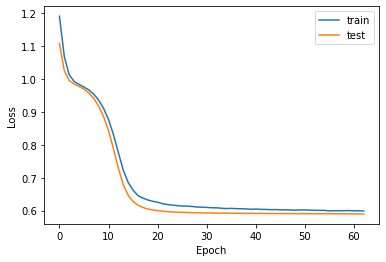

==============minmax===================
MAPE test is : 199.77217
MAPE test invert is : 10.69683
==============zscore===================
MAPE test is : 41023.28746
MAPE test invert is : 9.19444
RMSE Testing is : 0.768
RMSE Testing invert is : 3513.052
R2 test is : 0.41007


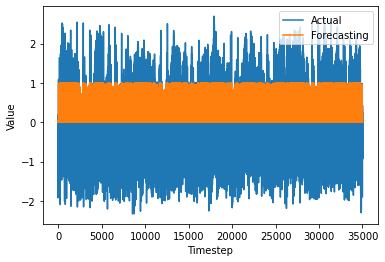

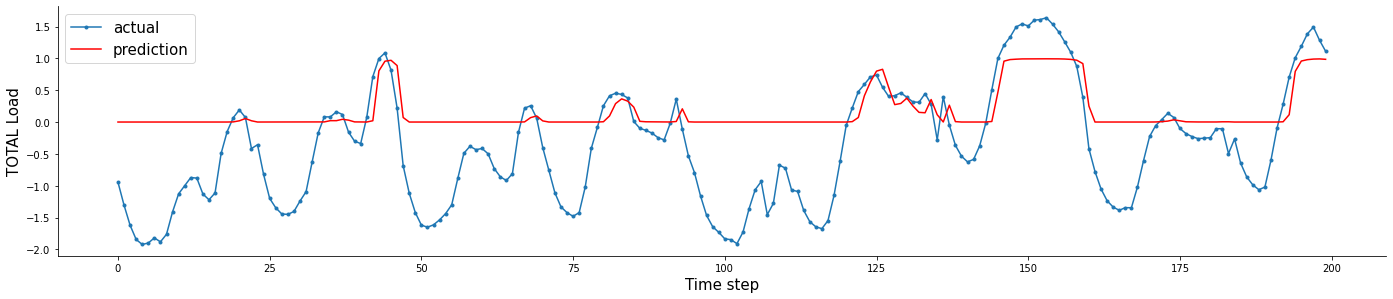

0                    1                    2  \
0   202,3292680712053   206,20082649595167    188,8094907469228   
1   10,68025166046016   10,682556714083443   10,732699172988275   
2   44787,70533995106   50659,901134098116   26680,621407380237   
3   9,176822498167768    9,177314997792987    9,233443997925946   
4  0.7673488527926317   0.7674620985425435   0.7690352231613977   
5   3510,561643145651   3511,0797336913565    3518,276657133334   
6  0,4109058454282084  0,41073195494336123  0,40831374528030084   
7                  46                   66                   50   

                    3                    4                    5  \
0  202,36923672535937     206,503653901118    200,4696799583305   
1  10,686841449622884   10,680292437820743   10,696838046552749   
2    42682,1247809311    51080,45470404596    42219,63991623734   
3   9,182431086314716    9,174874594739867    9,193040580323732   
4  0.7675297330707066   0.7673614371029372   0.7678438846403142   
5  3511,3891564258242    3510,619215391838   3512,8263755555395   
6  0,4106280889090127  0,41088652330528674  0,41014552779235236   
7                  49                   53                   55   

                     6                   7                    8  \
0    192,6843629940761  202,75466931764973    199,0171376567464   
1    10,71701696646126  10,691137603311176   10,710513936385063   
2    37926,06920851105   42857,63646297259    34348,64258361027   
3    9,216846404778419   9,186533248244347    9,207595343279056   
4   0.7684501002542415  0.7676752754400457   0.7683805946863269   
5   3515,5997650953614   3512,055001507099    3515,281782498765   
6  0,40921377551007954  0,4104045491202012  0,40932064276140645   
7                   88                  64                   90   

                    9           nama  
0  199,77216788206638        mminmax  
1  10,696831302074207  minmax invert  
2   41023,28745598867         zscore  
3   9,194436491493011  zscpre invert  
4  0.7678931767788947           rmse  
5  3513,0518832765442    rmse invert  
6  0,4100697933306565             r2  
7                  50          waktu

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto7
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(10):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network GRU
  model = Sequential()
  model.add(GRU(31, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 31, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 31, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=63, batch_size=1000, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto7") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto7")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto7")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig minmax

Epoch 1/63
36/36 [==============================] - 10s 56ms/step - loss: 0.0423 - val_loss: 0.0396
Epoch 2/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0415 - val_loss: 0.0396
Epoch 3/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0413 - val_loss: 0.0396
Epoch 4/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0411 - val_loss: 0.0395
Epoch 5/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0409 - val_loss: 0.0395
Epoch 6/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0408 - val_loss: 0.0394
Epoch 7/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0405 - val_loss: 0.0393
Epoch 8/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0403 - val_loss: 0.0392
Epoch 9/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0402 - val_loss: 0.0390
Epoch 10/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0398 - val_loss: 0.0388
Epoch 11

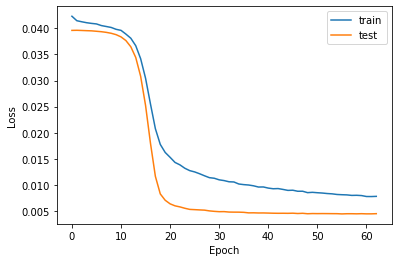

==============minmax===================
MAPE test is : 2240188969601.22266
MAPE test invert is : 4.40681
==============zscore===================
MAPE test is : 13.75672
MAPE test invert is : 4.35785
RMSE Testing is : 0.067
RMSE Testing invert is : 1541.487
R2 test is : 0.88642


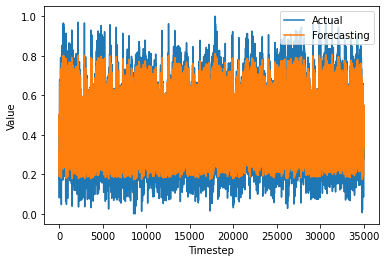

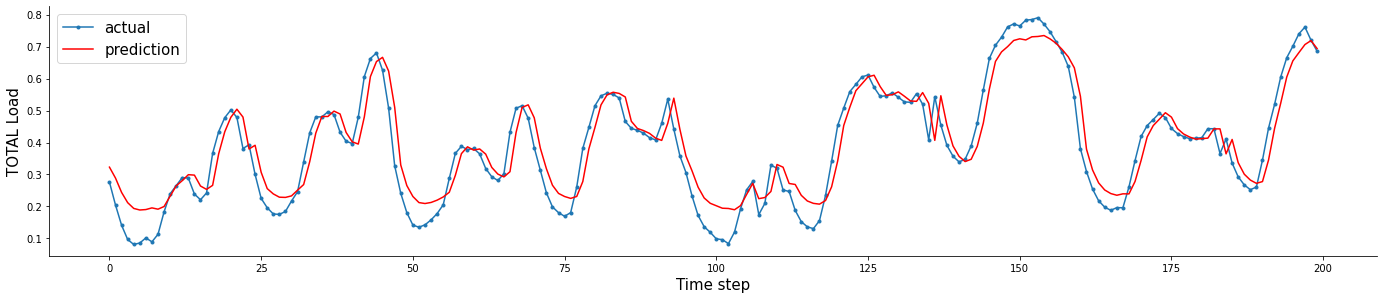

Epoch 1/63
36/36 [==============================] - 7s 35ms/step - loss: 0.0425 - val_loss: 0.0398
Epoch 2/63
36/36 [==============================] - 1s 14ms/step - loss: 0.0422 - val_loss: 0.0396
Epoch 3/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0419 - val_loss: 0.0396
Epoch 4/63
36/36 [==============================] - 1s 21ms/step - loss: 0.0416 - val_loss: 0.0396
Epoch 5/63
36/36 [==============================] - 1s 22ms/step - loss: 0.0414 - val_loss: 0.0396
Epoch 6/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0412 - val_loss: 0.0395
Epoch 7/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0410 - val_loss: 0.0395
Epoch 8/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0408 - val_loss: 0.0394
Epoch 9/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0405 - val_loss: 0.0393
Epoch 10/63
36/36 [==============================] - 1s 15ms/step - loss: 0.0404 - val_loss: 0.0391
Epoch 11/

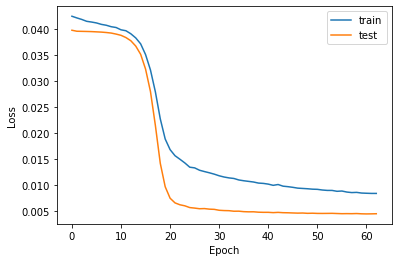

==============minmax===================
MAPE test is : 1963837332448.65039
MAPE test invert is : 4.39247
==============zscore===================
MAPE test is : 13.63653
MAPE test invert is : 4.33922
RMSE Testing is : 0.067
RMSE Testing invert is : 1537.926
R2 test is : 0.88694


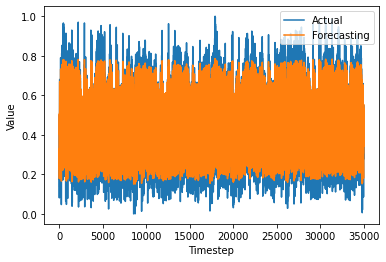

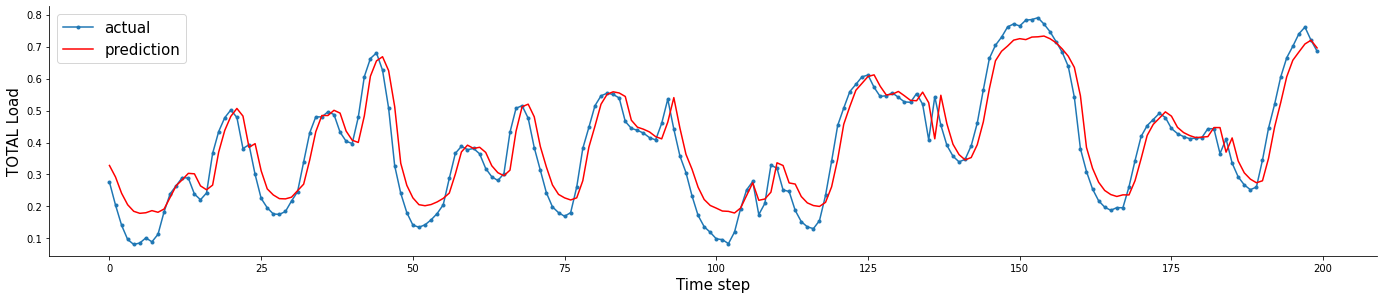

Epoch 1/63
36/36 [==============================] - 9s 39ms/step - loss: 0.0473 - val_loss: 0.0396
Epoch 2/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0413 - val_loss: 0.0396
Epoch 3/63
36/36 [==============================] - 1s 19ms/step - loss: 0.0412 - val_loss: 0.0395
Epoch 4/63
36/36 [==============================] - 1s 25ms/step - loss: 0.0410 - val_loss: 0.0395
Epoch 5/63
36/36 [==============================] - 1s 18ms/step - loss: 0.0410 - val_loss: 0.0394
Epoch 6/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0406 - val_loss: 0.0393
Epoch 7/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0406 - val_loss: 0.0392
Epoch 8/63
36/36 [==============================] - 1s 19ms/step - loss: 0.0402 - val_loss: 0.0391
Epoch 9/63
36/36 [==============================] - 1s 18ms/step - loss: 0.0401 - val_loss: 0.0389
Epoch 10/63
36/36 [==============================] - 1s 18ms/step - loss: 0.0399 - val_loss: 0.0387
Epoch 11/

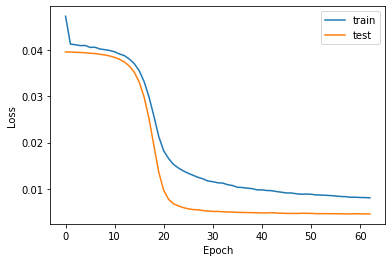

==============minmax===================
MAPE test is : 2523847526458.33594
MAPE test invert is : 4.44416
==============zscore===================
MAPE test is : 13.88439
MAPE test invert is : 4.38521
RMSE Testing is : 0.068
RMSE Testing invert is : 1555.021
R2 test is : 0.88441


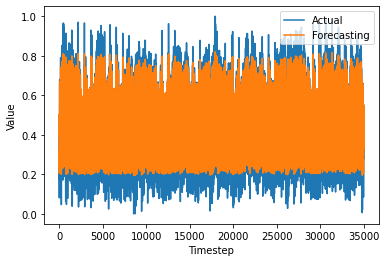

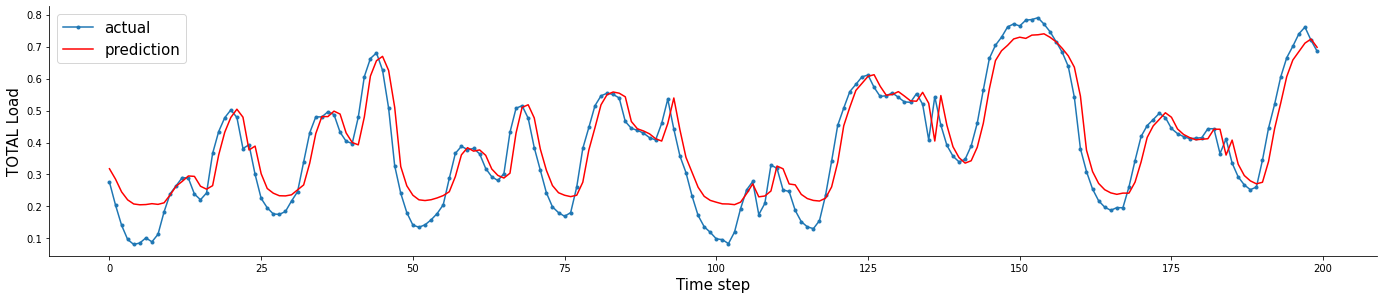

Epoch 1/63
36/36 [==============================] - 8s 38ms/step - loss: 0.0415 - val_loss: 0.0398
Epoch 2/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0414 - val_loss: 0.0396
Epoch 3/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0411 - val_loss: 0.0396
Epoch 4/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0410 - val_loss: 0.0396
Epoch 5/63
36/36 [==============================] - 1s 18ms/step - loss: 0.0408 - val_loss: 0.0395
Epoch 6/63
36/36 [==============================] - 1s 25ms/step - loss: 0.0408 - val_loss: 0.0395
Epoch 7/63
36/36 [==============================] - 1s 20ms/step - loss: 0.0405 - val_loss: 0.0394
Epoch 8/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0405 - val_loss: 0.0393
Epoch 9/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0403 - val_loss: 0.0392
Epoch 10/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0402 - val_loss: 0.0390
Epoch 11/

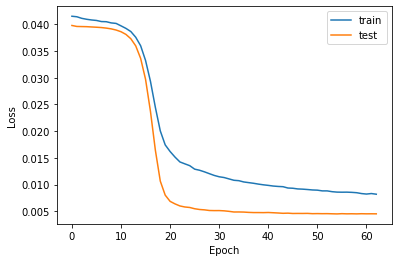

==============minmax===================
MAPE test is : 2086362340196.92188
MAPE test invert is : 4.41439
==============zscore===================
MAPE test is : 13.68218
MAPE test invert is : 4.35170
RMSE Testing is : 0.067
RMSE Testing invert is : 1541.479
R2 test is : 0.88642


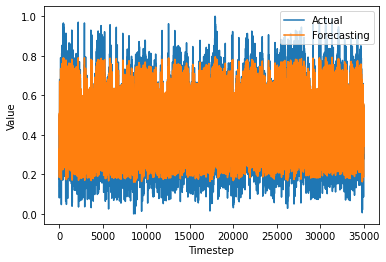

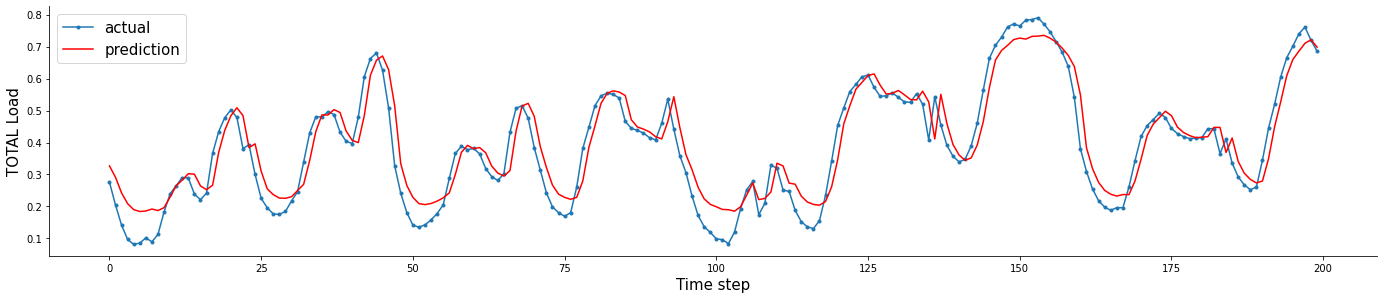

Epoch 1/63
36/36 [==============================] - 7s 45ms/step - loss: 0.0413 - val_loss: 0.0397
Epoch 2/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0413 - val_loss: 0.0396
Epoch 3/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0408 - val_loss: 0.0396
Epoch 4/63
36/36 [==============================] - 1s 18ms/step - loss: 0.0408 - val_loss: 0.0396
Epoch 5/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0408 - val_loss: 0.0396
Epoch 6/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0406 - val_loss: 0.0395
Epoch 7/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0405 - val_loss: 0.0395
Epoch 8/63
36/36 [==============================] - 1s 17ms/step - loss: 0.0403 - val_loss: 0.0394
Epoch 9/63
36/36 [==============================] - 1s 16ms/step - loss: 0.0401 - val_loss: 0.0393
Epoch 10/63
36/36 [==============================] - 1s 18ms/step - loss: 0.0399 - val_loss: 0.0391
Epoch 11/

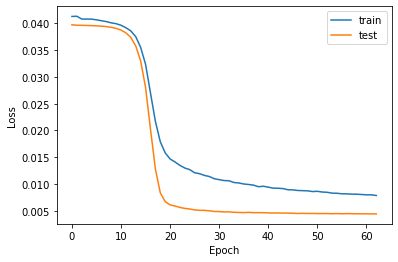

==============minmax===================
MAPE test is : 2106655462528.12915
MAPE test invert is : 4.35494
==============zscore===================
MAPE test is : 13.60100
MAPE test invert is : 4.30607
RMSE Testing is : 0.067
RMSE Testing invert is : 1529.212
R2 test is : 0.88822


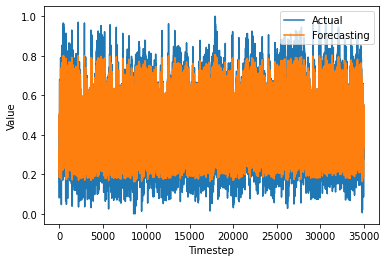

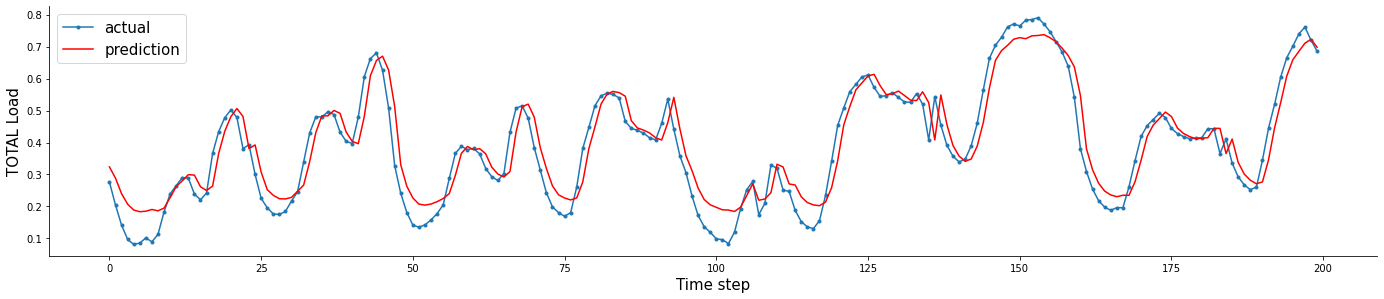

0                    1                    2  \
0   2240188969601,2227   1963837332448,6504    2523847526458,336   
1    4,406807264517409    4,392473976052069     4,44415963923244   
2    13,75671608420056   13,636531391719195   13,884388452377067   
3    4,357853138439552    4,339221177069379    4,385213845288085   
4  0.06709700145409012  0.06694200078770174  0.06768610448567274   
5   1541,4865114062663   1537,9255260966595   1555,0205644538455   
6   0,8864176200819761   0,8869417868601698   0,8844143871192849   
7                   49                   47                   50   

                     3                    4           nama  
0   2086362340196,9219   2106655462528,1292        mminmax  
1    4,414387769750556    4,354940498861205  minmax invert  
2   13,682180053127855   13,600996017927116         zscore  
3    4,351700226796074    4,306071139214876  zscpre invert  
4  0.06709665984415164  0.06656272580170568           rmse  
5   1541,4786632595396    1529,212062568386    rmse invert  
6   0,8864187766395033   0,8882192711935055             r2  
7                   89                   46          waktu

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto8
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network GRU
  model = Sequential()
  model.add(GRU(31, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 31, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 31, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=63, batch_size=1000, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto8") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto8")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto8")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc